In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
#from pandas import datetime
from datetime import datetime

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.tools.eval_measures as em
from   sklearn.metrics import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## This is to display multiple data frames from one cell
from IPython.display import display

from pylab import rcParams
rcParams['figure.figsize'] = 20,5

In [3]:
df = pd.read_excel("Stock Market- New.xlsx",
                   parse_dates=True,index_col='Date',sheet_name="FullData")
df

,Stock1,Stock2,Stock3,Stock4
Date,,,,
2010-07-21,23.94,312.22,144.64,503.74
2010-07-22,24.48,319.24,146.88,518.08
2010-07-23,25.50,335.50,155.00,540.50
2010-07-26,26.59,349.67,162.54,563.39
2010-07-27,25.51,332.63,156.06,537.71
...,...,...,...,...
2017-10-25,59.80,780.40,362.80,1257.80
2017-10-26,58.05,754.65,353.30,1220.05
2017-10-27,58.19,758.47,352.14,1224.99


In [4]:
df1 = df.resample('D').ffill()
df1

# # df1 is a continous data (dateTiem Index).

,Stock1,Stock2,Stock3,Stock4
Date,,,,
2010-07-21,23.94,312.22,144.64,503.74
2010-07-22,24.48,319.24,146.88,518.08
2010-07-23,25.50,335.50,155.00,540.50
2010-07-24,25.50,335.50,155.00,540.50
2010-07-25,25.50,335.50,155.00,540.50
...,...,...,...,...
2017-10-27,58.19,758.47,352.14,1224.99
2017-10-28,58.19,758.47,352.14,1224.99
2017-10-29,58.19,758.47,352.14,1224.99


In [5]:
# df1.to_excel('Stock Market- continous dates_AAA.xlsx')

In [6]:
# Already treated given TS data which originally had only weekdays stock prices.
# Converted original TS data into continous data (weekday + weekends + holidays).
# Stock price is closing price of the day.

df1 = pd.read_excel('Stock Market- continous dates_1.xlsx', parse_dates=True, index_col='Date')
df1

,Stock1,Stock2,Stock3,Stock4
Date,,,,
2010-07-21,23.94,312.22,144.64,503.74
2010-07-22,24.48,319.24,146.88,518.08
2010-07-23,25.50,335.50,155.00,540.50
2010-07-24,25.50,335.50,155.00,540.50
2010-07-25,25.50,335.50,155.00,540.50
...,...,...,...,...
2017-10-27,58.19,758.47,352.14,1224.99
2017-10-28,58.19,758.47,352.14,1224.99
2017-10-29,58.19,758.47,352.14,1224.99


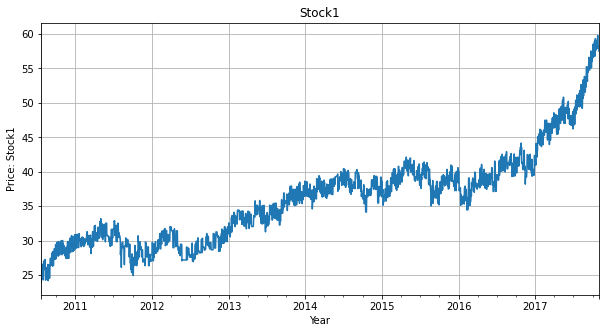

In [7]:
# this is time-series plot. Time is in x axis.  

from pylab import rcParams
rcParams['figure.figsize'] = 10,5
df1['Stock1'].plot(title = 'Stock1', ylabel= 'Price: Stock1', xlabel = 'Year')
plt.grid();

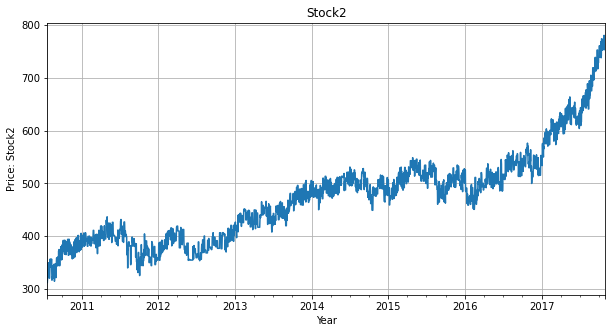

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
df1['Stock2'].plot(title = 'Stock2', ylabel= 'Price: Stock2', xlabel = 'Year')
plt.grid();

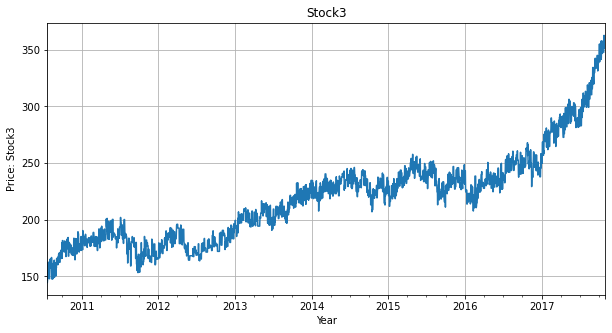

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
df1['Stock3'].plot(title = 'Stock3', ylabel= 'Price: Stock3', xlabel = 'Year')
plt.grid();

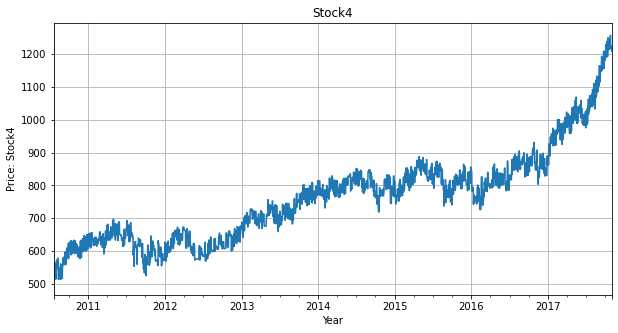

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
df1['Stock4'].plot(title = 'Stock4', ylabel= 'Price: Stock4', xlabel = 'Year')
plt.grid();

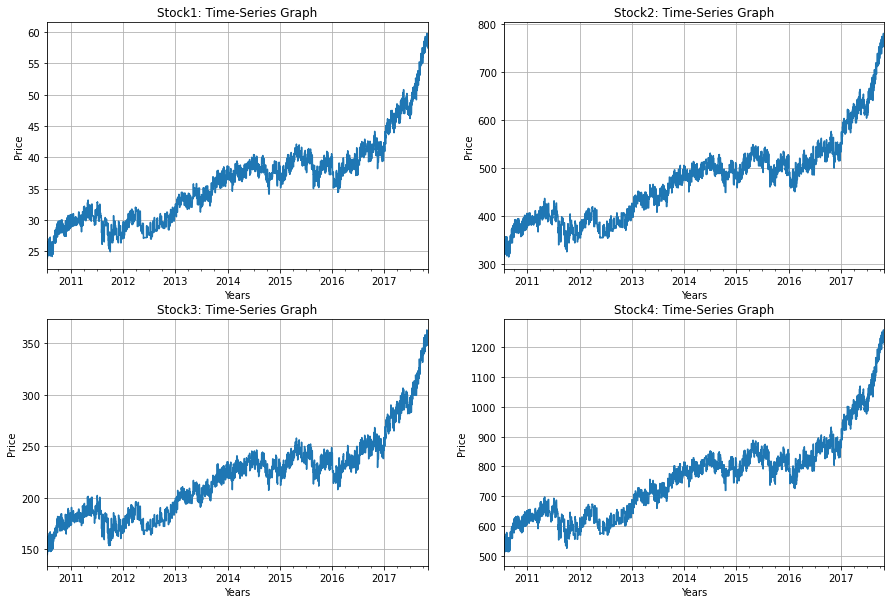

In [11]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)

df1['Stock1'].plot(ax=axes[0][0], grid = True, title = 'Stock1: Time-Series Graph', 
                        ylabel = 'Price', xlabel = 'Years');
df1['Stock2'].plot(ax=axes[0][1], grid = True, title = 'Stock2: Time-Series Graph', 
                        ylabel = 'Price', xlabel = 'Years');

df1['Stock3'].plot(ax=axes[1][0], grid = True, title = 'Stock3: Time-Series Graph', 
                        ylabel = 'Price', xlabel = 'Years');
df1['Stock4'].plot(ax=axes[1][1], grid = True, title = 'Stock4: Time-Series Graph', 
                        ylabel = 'Price', xlabel = 'Years');


In [12]:
df1.isnull().sum().to_frame()

,0
Stock1,0
Stock2,0
Stock3,0
Stock4,0


In [13]:
df1.index

DatetimeIndex(['2010-07-21', '2010-07-22', '2010-07-23', '2010-07-24',
               '2010-07-25', '2010-07-26', '2010-07-27', '2010-07-28',
               '2010-07-29', '2010-07-30',
               ...
               '2017-10-22', '2017-10-23', '2017-10-24', '2017-10-25',
               '2017-10-26', '2017-10-27', '2017-10-28', '2017-10-29',
               '2017-10-30', '2017-10-31'],
              dtype='datetime64[ns]', name='Date', length=2660, freq=None)

In [14]:
df1.index.duplicated().sum()

0

In [15]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Stock1,2660.0,36.146741,6.683423,23.94,30.3700,36.46,39.5400,59.8
Stock2,2660.0,472.448605,86.890237,312.22,396.8725,476.68,516.5675,780.4
Stock3,2660.0,219.429692,40.156319,144.64,184.0750,221.05,239.6250,362.8
Stock4,2660.0,761.683808,140.294168,503.74,639.9975,768.66,832.4050,1257.8


In [16]:
print('Stock1 price:','\n', df1['Stock1'])
print('\n')
print('Stock2 price:','\n', df1['Stock2'])
print('\n')
print('Stock3 price:','\n', df1['Stock3'])
print('\n')
print('Stock4 price:','\n', df1['Stock4'])

Stock1 price: 
 Date
2010-07-21    23.94
2010-07-22    24.48
2010-07-23    25.50
2010-07-24    25.50
2010-07-25    25.50
              ...  
2017-10-27    58.19
2017-10-28    58.19
2017-10-29    58.19
2017-10-30    58.13
2017-10-31    57.50
Name: Stock1, Length: 2660, dtype: float64


Stock2 price: 
 Date
2010-07-21    312.22
2010-07-22    319.24
2010-07-23    335.50
2010-07-24    335.50
2010-07-25    335.50
               ...  
2017-10-27    758.47
2017-10-28    758.47
2017-10-29    758.47
2017-10-30    756.69
2017-10-31    752.50
Name: Stock2, Length: 2660, dtype: float64


Stock3 price: 
 Date
2010-07-21    144.64
2010-07-22    146.88
2010-07-23    155.00
2010-07-24    155.00
2010-07-25    155.00
               ...  
2017-10-27    352.14
2017-10-28    352.14
2017-10-29    352.14
2017-10-30    353.78
2017-10-31    348.00
Name: Stock3, Length: 2660, dtype: float64


Stock4 price: 
 Date
2010-07-21     503.74
2010-07-22     518.08
2010-07-23     540.50
2010-07-24     540.50
2010-07-25 

## Resampling

In [17]:
# Resampled the data into yearly average data.
# this gives smoother looks to my data.

df1_yearly_avg = df1.resample('A').mean()
df1_yearly_avg.head(10).round(2)

,Stock1,Stock2,Stock3,Stock4
Date,,,,
2010-12-31,27.76,363.53,168.90,585.87
2011-12-31,29.60,387.34,180.24,624.12
2012-12-31,29.46,385.54,179.34,621.37
2013-12-31,34.27,447.71,208.14,722.30
2014-12-31,37.81,494.28,229.42,796.73
2015-12-31,38.88,508.03,235.78,818.79
2016-12-31,39.52,516.33,239.55,832.41
2017-12-31,49.50,645.98,299.73,1042.13


In [18]:
df1_yearly_Stock1 = df1['Stock1'].resample('A').mean().to_frame()
df1_yearly_Stock2 = df1['Stock2'].resample('A').mean().to_frame()
df1_yearly_Stock3 = df1['Stock3'].resample('A').mean().to_frame()
df1_yearly_Stock4 = df1['Stock4'].resample('A').mean().to_frame()

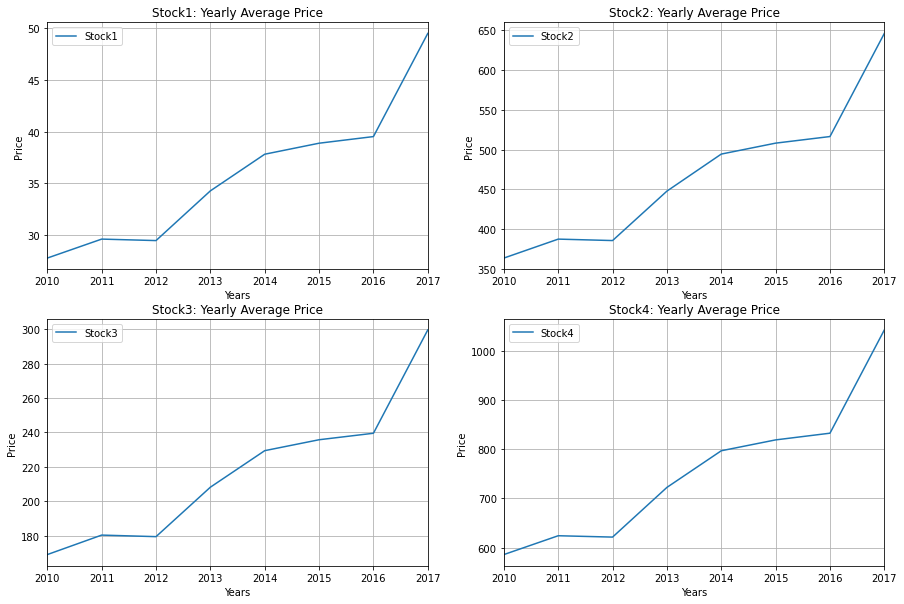

In [19]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)

df1_yearly_Stock1.plot(ax=axes[0][0], grid = True, title = 'Stock1: Yearly Average Price', 
                        ylabel = 'Price', xlabel = 'Years');
df1_yearly_Stock2.plot(ax=axes[0][1], grid = True, title = 'Stock2: Yearly Average Price', 
                        ylabel = 'Price', xlabel = 'Years');

df1_yearly_Stock3.plot(ax=axes[1][0], grid = True, title = 'Stock3: Yearly Average Price', 
                        ylabel = 'Price', xlabel = 'Years');
df1_yearly_Stock4.plot(ax=axes[1][1], grid = True, title = 'Stock4: Yearly Average Price', 
                        ylabel = 'Price', xlabel = 'Years');


In [20]:
# Resampled the data into QUARTERLY average data.
# this gives quarterly price movement to all four stocks.

df1_qtrly_avg = df1.resample('Q').mean()
df1_qtrly_avg.round(2)

,Stock1,Stock2,Stock3,Stock4
Date,,,,
2010-09-30,26.21,343.42,159.77,553.52
2010-12-31,28.98,379.26,176.04,611.19
2011-03-31,29.96,392.37,182.04,631.77
2011-06-30,30.98,405.01,188.51,653.74
2011-09-30,29.58,386.99,180.24,623.36
2011-12-31,27.90,365.31,170.30,588.09
2012-03-31,29.80,389.92,181.42,628.41
2012-06-30,28.95,378.66,176.84,610.04
2012-09-30,28.76,376.35,175.08,607.38


In [21]:
df1_qtr_Stock1 = df1['Stock1'].resample('Q').mean().to_frame()
df1_qtr_Stock2 = df1['Stock2'].resample('Q').mean().to_frame()
df1_qtr_Stock3 = df1['Stock3'].resample('Q').mean().to_frame()
df1_qtr_Stock4 = df1['Stock4'].resample('Q').mean().to_frame()

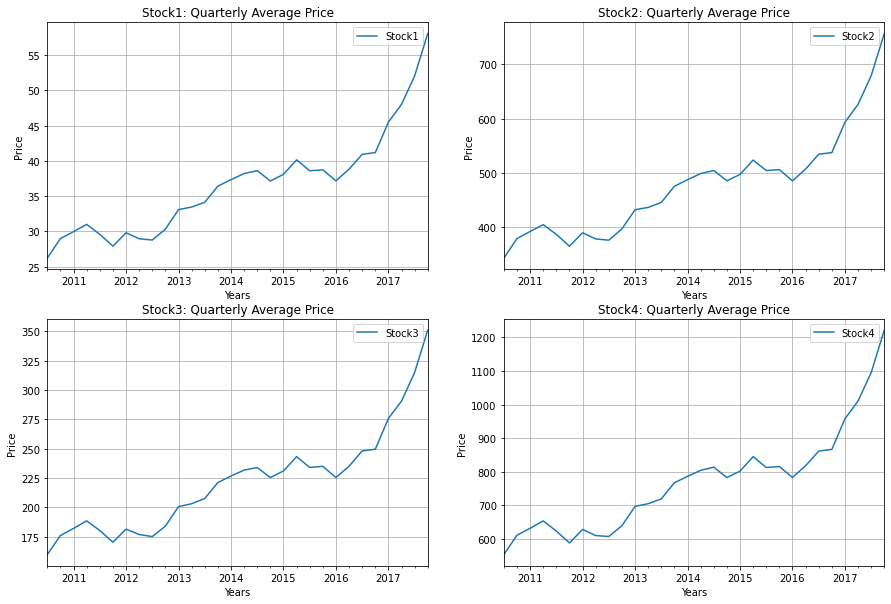

In [22]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)

df1_qtr_Stock1.plot(ax=axes[0][0], grid = True, title = 'Stock1: Quarterly Average Price', 
                        ylabel = 'Price', xlabel = 'Years');
df1_qtr_Stock2.plot(ax=axes[0][1], grid = True, title = 'Stock2: Quarterly Average Price', 
                        ylabel = 'Price', xlabel = 'Years');

df1_qtr_Stock3.plot(ax=axes[1][0], grid = True, title = 'Stock3: Quarterly Average Price', 
                        ylabel = 'Price', xlabel = 'Years');
df1_qtr_Stock4.plot(ax=axes[1][1], grid = True, title = 'Stock4: Quarterly Average Price', 
                        ylabel = 'Price', xlabel = 'Years');


In [23]:
# Resampled the data into Monthly average price.
# this gives monthly price movement to all four stocks.

df1_monthly_avg = df1.resample('M').mean()
print(df1_monthly_avg.shape, 'rows are count of months & columns are count of stocks')
df1_monthly_avg.round(2)

(88, 4) rows are count of months & columns are count of stocks


,Stock1,Stock2,Stock3,Stock4
Date,,,,
2010-07-31,25.03,328.33,152.01,529.05
2010-08-31,25.49,334.14,155.74,538.41
2010-09-30,27.39,358.55,166.76,578.12
2010-10-31,28.97,379.24,176.60,610.78
2010-11-30,28.78,376.07,174.80,607.34
...,...,...,...,...
2017-06-30,48.08,627.39,291.46,1012.18
2017-07-31,49.31,643.90,298.72,1037.37
2017-08-31,51.37,670.49,310.70,1081.32


## when monthly avg price is Minimum!!!

In [24]:
# Resampled the data into Monthly average price.
# this gives monthly price movement to all four stocks.

df1_monthly_avg_2010 = df1['2010-1-1' : '2010-12-31'].resample('M').mean()
print(df1_monthly_avg_2010.shape, 'printed monthly avg prices of all 4 stocks in YEAR-2010.')
df1_monthly_avg_2010.round(1).T

(6, 4) printed monthly avg prices of all 4 stocks in YEAR-2010.


Date,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31
Stock1,25.0,25.5,27.4,29.0,28.8,29.2
Stock2,328.3,334.1,358.5,379.2,376.1,382.4
Stock3,152.0,155.7,166.8,176.6,174.8,176.7
Stock4,529.1,538.4,578.1,610.8,607.3,615.3


In [25]:
print(df1_monthly_avg_2010['Stock1'].sort_values(ascending = True).head(3), 'Stock1 min value: Monthly Avg Price')
print(df1_monthly_avg_2010['Stock2'].sort_values(ascending = True).head(2), 'Stock2 min value: Monthly Avg Price')
print(df1_monthly_avg_2010['Stock3'].sort_values(ascending = True).head(1), 'Stock3 min value: Monthly Avg Price')
print(df1_monthly_avg_2010['Stock4'].sort_values(ascending = True).head(1), 'Stock4 min value: Monthly Avg Price')

Date
2010-07-31    25.032727
2010-08-31    25.489355
2010-09-30    27.388333
Name: Stock1, dtype: float64 Stock1 min value: Monthly Avg Price
Date
2010-07-31    328.334545
2010-08-31    334.135806
Name: Stock2, dtype: float64 Stock2 min value: Monthly Avg Price
Date
2010-07-31    152.014545
Name: Stock3, dtype: float64 Stock3 min value: Monthly Avg Price
Date
2010-07-31    529.050909
Name: Stock4, dtype: float64 Stock4 min value: Monthly Avg Price


In [26]:
# print(df1_monthly_avg_2011['Stock1'].sort_values(ascending = True).head(3), 'Stock1 min value: Monthly Avg Price')
# print(df1_monthly_avg_2011['Stock2'].sort_values(ascending = True).head(3), 'Stock2 min value: Monthly Avg Price')
# print(df1_monthly_avg_2011['Stock3'].sort_values(ascending = True).head(1), 'Stock3 min value: Monthly Avg Price')
# print(df1_monthly_avg_2011['Stock4'].sort_values(ascending = True).head(1), 'Stock4 min value: Monthly Avg Price')

In [27]:
# print(df1_monthly_avg_2012['Stock1'].sort_values(ascending = True).head(3), 'Stock1 min value: Monthly Avg Price')
# print(df1_monthly_avg_2012['Stock2'].sort_values(ascending = True).head(2), 'Stock2 min value: Monthly Avg Price')
# print(df1_monthly_avg_2012['Stock3'].sort_values(ascending = True).head(2), 'Stock3 min value: Monthly Avg Price')
# print(df1_monthly_avg_2012['Stock4'].sort_values(ascending = True).head(2), 'Stock4 min value: Monthly Avg Price')

In [28]:
# print(df1_monthly_avg_2013['Stock1'].sort_values(ascending = True).head(3), 'Stock1 min value: Monthly Avg Price')
# print(df1_monthly_avg_2013['Stock2'].sort_values(ascending = True).head(2), 'Stock2 min value: Monthly Avg Price')
# print(df1_monthly_avg_2013['Stock3'].sort_values(ascending = True).head(1), 'Stock3 min value: Monthly Avg Price')
# print(df1_monthly_avg_2013['Stock4'].sort_values(ascending = True).head(1), 'Stock4 min value: Monthly Avg Price')

In [29]:
# print(df1_monthly_avg_2014['Stock1'].sort_values(ascending = True).head(3), 'Stock1 min value: Monthly Avg Price')
# print(df1_monthly_avg_2014['Stock2'].sort_values(ascending = True).head(3), 'Stock2 min value: Monthly Avg Price')
# print(df1_monthly_avg_2014['Stock3'].sort_values(ascending = True).head(3), 'Stock3 min value: Monthly Avg Price')
# print(df1_monthly_avg_2014['Stock4'].sort_values(ascending = True).head(3), 'Stock4 min value: Monthly Avg Price')

In [30]:
# print(df1_monthly_avg_2017['Stock1'].sort_values(ascending = True).head(2), 'Stock1 min value: Monthly Avg Price')
# print(df1_monthly_avg_2017['Stock2'].sort_values(ascending = True).head(2), 'Stock2 min value: Monthly Avg Price')
# print(df1_monthly_avg_2017['Stock3'].sort_values(ascending = True).head(2), 'Stock3 min value: Monthly Avg Price')
# print(df1_monthly_avg_2017['Stock4'].sort_values(ascending = True).head(2), 'Stock4 min value: Monthly Avg Price')

## when monthly avg price is maximum!!!

In [31]:
# print(df1_monthly_avg_2012['Stock1'].sort_values(ascending = False).head(2), 'Stock1 Max value: Monthly Avg Price')
# print(df1_monthly_avg_2012['Stock2'].sort_values(ascending = False).head(2), 'Stock2 Max value: Monthly Avg Price')
# print(df1_monthly_avg_2012['Stock3'].sort_values(ascending = False).head(2), 'Stock3 Max value: Monthly Avg Price')
# print(df1_monthly_avg_2012['Stock4'].sort_values(ascending = False).head(2), 'Stock4 Max value: Monthly Avg Price')

In [32]:
# print(df1_monthly_avg_2017['Stock1'].sort_values(ascending = False).head(2), 'Stock1 Max value: Monthly Avg Price')
# print(df1_monthly_avg_2017['Stock2'].sort_values(ascending = False).head(2), 'Stock2 Max value: Monthly Avg Price')
# print(df1_monthly_avg_2017['Stock3'].sort_values(ascending = False).head(2), 'Stock3 Max value: Monthly Avg Price')
# print(df1_monthly_avg_2017['Stock4'].sort_values(ascending = False).head(2), 'Stock4 Max value: Monthly Avg Price')

In [33]:
# Resampled the data into Monthly average price.
# this gives monthly price movement to all four stocks.

df1_monthly_avg_2011 = df1['2011-1-1' : '2011-12-31'].resample('M').mean()
print(df1_monthly_avg_2011.shape, 'printed monthly avg prices of all 4 stocks in YEAR-2011.')
df1_monthly_avg_2011.round(1).T

(12, 4) printed monthly avg prices of all 4 stocks in YEAR-2011.


Date,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31
Stock1,29.8,30.1,30.1,31.0,31.6,30.3,31.3,29.1,28.4,27.8,28.0,27.9
Stock2,389.9,393.9,393.5,405.5,413.0,396.2,409.1,380.4,371.0,363.4,367.6,365.1
Stock3,181.1,182.2,182.8,187.5,192.5,185.4,190.3,177.9,172.3,168.8,171.8,170.4
Stock4,628.5,633.3,633.7,654.2,666.4,640.3,659.0,612.8,597.4,585.7,590.8,587.9


In [35]:
# Resampled the data into Monthly average price.
# this gives monthly price movement to all four stocks.

df1_monthly_avg_2012 = df1['2012-1-1' : '2012-12-31'].resample('M').mean()
print(df1_monthly_avg_2012.shape, 'printed monthly avg prices of all 4 stocks in YEAR-2012.')
df1_monthly_avg_2012.round(1).T

(12, 4) printed monthly avg prices of all 4 stocks in YEAR-2012.


Date,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31
Stock1,28.4,30.3,30.7,30.7,28.4,27.8,27.9,28.9,29.5,29.5,30.4,31.1
Stock2,372.6,396.2,401.3,401.2,372.5,362.6,366.3,377.8,385.2,386.5,397.6,407.4
Stock3,173.5,184.2,186.8,187.2,173.0,170.5,170.3,175.7,179.4,178.3,184.9,188.9
Stock4,600.0,639.1,646.9,645.0,599.5,585.9,589.6,611.0,622.0,622.8,641.6,654.5


In [36]:
# Resampled the data into Monthly average price.
# this gives monthly price movement to all four stocks.

df1_monthly_avg_2013 = df1['2013-1-1' : '2013-12-31'].resample('M').mean()
print(df1_monthly_avg_2013.shape, 'printed monthly avg prices of all 4 stocks in YEAR-2013.')
df1_monthly_avg_2013.round(1).T

(12, 4) printed monthly avg prices of all 4 stocks in YEAR-2013.


Date,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31
Stock1,32.5,33.6,33.2,32.9,34.2,33.2,33.6,33.9,34.8,36.2,36.3,36.7
Stock2,425.7,438.9,433.2,428.5,447.3,433.9,439.4,443.7,454.4,472.4,474.6,479.7
Stock3,197.6,204.2,200.4,199.4,208.2,201.6,204.9,206.3,211.6,219.5,220.3,223.6
Stock4,685.5,707.4,698.7,692.6,721.2,700.6,708.7,714.9,734.2,762.9,764.8,774.8


In [37]:
# Resampled the data into Monthly average price.
# this gives monthly price movement to all four stocks.

df1_monthly_avg_2014 = df1['2014-1-1' : '2014-12-31'].resample('M').mean()
print(df1_monthly_avg_2014.shape, 'printed monthly avg prices of all 4 stocks in YEAR-2014.')
df1_monthly_avg_2014.round(1).T

(12, 4) printed monthly avg prices of all 4 stocks in YEAR-2014.


Date,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31
Stock1,37.1,36.9,38.0,37.2,38.5,38.8,39.1,38.3,38.4,36.3,37.6,37.5
Stock2,484.9,481.5,496.0,486.4,503.8,506.6,510.9,500.4,502.6,474.7,491.6,491.0
Stock3,224.8,223.9,231.0,226.5,233.8,234.7,236.4,231.5,233.8,220.2,228.5,227.4
Stock4,781.7,776.4,799.6,783.9,811.9,816.7,823.8,808.1,808.9,764.6,792.8,790.7


In [38]:
# Resampled the data into Monthly average price.
# this gives monthly price movement to all four stocks.

df1_monthly_avg_2015 = df1['2015-1-1' : '2015-12-31'].resample('M').mean()
print(df1_monthly_avg_2015.shape, 'printed monthly avg prices of all 4 stocks in YEAR-2015.')
df1_monthly_avg_2015.round(1).T

(12, 4) printed monthly avg prices of all 4 stocks in YEAR-2015.


Date,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31
Stock1,36.9,38.2,39.1,40.3,40.6,39.4,39.8,39.0,36.9,38.1,39.2,38.9
Stock2,482.6,499.7,510.2,526.5,530.8,514.2,520.2,509.9,482.8,498.5,512.8,507.7
Stock3,223.8,231.8,237.4,243.9,246.6,239.0,241.6,236.4,223.6,231.0,237.7,236.0
Stock4,777.4,806.0,822.7,848.4,855.9,830.3,837.1,820.5,779.0,802.9,824.8,819.4


In [39]:
# Resampled the data into Monthly average price.
# this gives monthly price movement to all four stocks.

df1_monthly_avg_2016 = df1['2016-1-1' : '2016-12-31'].resample('M').mean()
print(df1_monthly_avg_2016.shape, 'printed monthly avg prices of all 4 stocks in YEAR-2016.')
df1_monthly_avg_2016.round(1).T

(12, 4) printed monthly avg prices of all 4 stocks in YEAR-2016.


Date,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31
Stock1,36.8,36.4,38.1,38.9,38.7,38.8,40.4,41.3,41.1,42.0,40.9,40.6
Stock2,480.9,477.0,497.9,508.3,506.7,506.9,527.6,539.4,536.9,547.9,534.1,530.5
Stock3,223.7,221.4,230.8,235.7,234.2,235.2,244.3,250.2,249.7,254.0,248.6,246.0
Stock4,775.8,768.6,803.6,819.9,816.5,817.6,850.8,869.3,864.6,883.4,860.4,855.4


In [40]:
# Resampled the data into Monthly average price.
# this gives monthly price movement to all four stocks.

df1_monthly_avg_2017 = df1['2017-1-1' : ].resample('M').mean()
print(df1_monthly_avg_2017.shape, 'printed monthly avg prices of all 4 stocks in remaining months of YEAR-2017.')
df1_monthly_avg_2017.round(1).T

(10, 4) printed monthly avg prices of all 4 stocks in remaining months of YEAR-2017.


Date,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31
Stock1,44.1,46.0,46.4,47.1,48.9,48.1,49.3,51.4,55.5,58.1
Stock2,575.5,599.8,606.0,614.0,637.5,627.4,643.9,670.5,724.8,757.0
Stock3,267.9,278.3,281.4,284.2,295.8,291.5,298.7,310.7,336.1,351.1
Stock4,927.6,968.5,978.0,991.0,1028.3,1012.2,1037.4,1081.3,1169.3,1222.1


In [41]:
df1['2015-1-1' : '2015-12-31'] # Data of year 2015 prices.

,Stock1,Stock2,Stock3,Stock4
Date,,,,
2015-01-01,38.68,506.84,234.08,813.28
2015-01-02,36.89,481.57,221.34,777.69
2015-01-03,36.89,481.57,221.34,777.69
2015-01-04,36.89,481.57,221.34,777.69
2015-01-05,37.45,491.85,229.70,788.45
...,...,...,...,...
2015-12-27,39.52,514.76,242.12,832.92
2015-12-28,38.92,510.96,237.52,820.32
2015-12-29,40.59,527.67,248.54,856.39


## Monthly resampled Graph

In [42]:
df1_M_Stock1 = df1['Stock1'].resample('M').mean().to_frame()
df1_M_Stock2 = df1['Stock2'].resample('M').mean().to_frame()
df1_M_Stock3 = df1['Stock3'].resample('M').mean().to_frame()
df1_M_Stock4 = df1['Stock4'].resample('M').mean().to_frame()

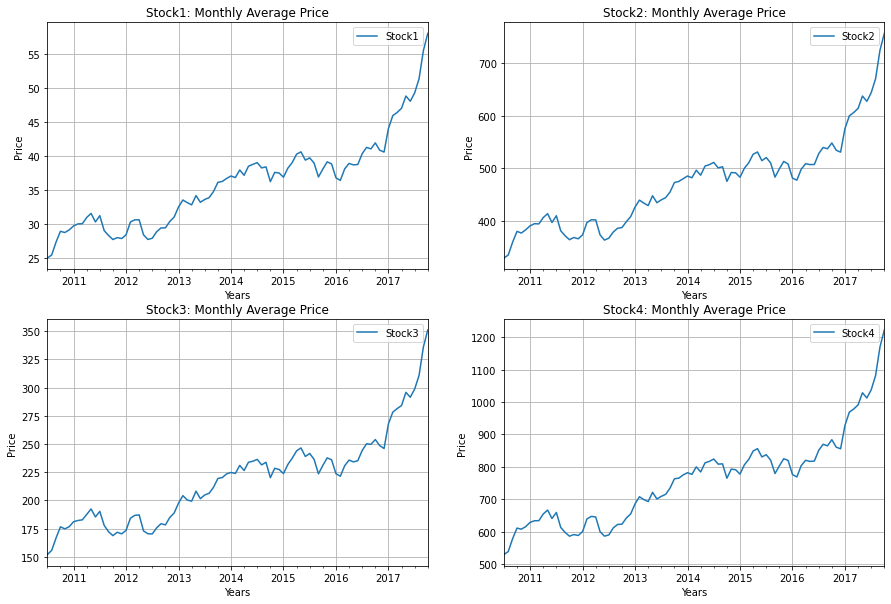

In [43]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)

df1_M_Stock1.plot(ax=axes[0][0], grid = True, title = 'Stock1: Monthly Average Price', 
                        ylabel = 'Price', xlabel = 'Years');
df1_M_Stock2.plot(ax=axes[0][1], grid = True, title = 'Stock2: Monthly Average Price', 
                        ylabel = 'Price', xlabel = 'Years');

df1_M_Stock3.plot(ax=axes[1][0], grid = True, title = 'Stock3: Monthly Average Price', 
                        ylabel = 'Price', xlabel = 'Years');
df1_M_Stock4.plot(ax=axes[1][1], grid = True, title = 'Stock4: Monthly Average Price', 
                        ylabel = 'Price', xlabel = 'Years');


<AxesSubplot:>

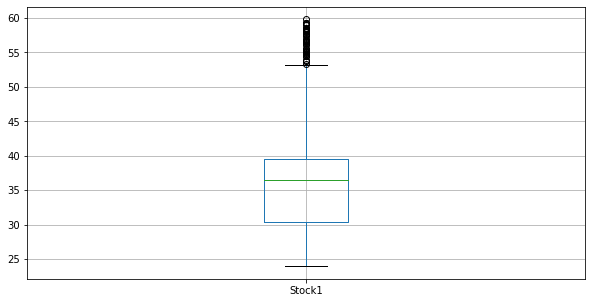

In [44]:
df1['Stock1'].to_frame().boxplot()

<AxesSubplot:xlabel='Stock4', ylabel='Density'>

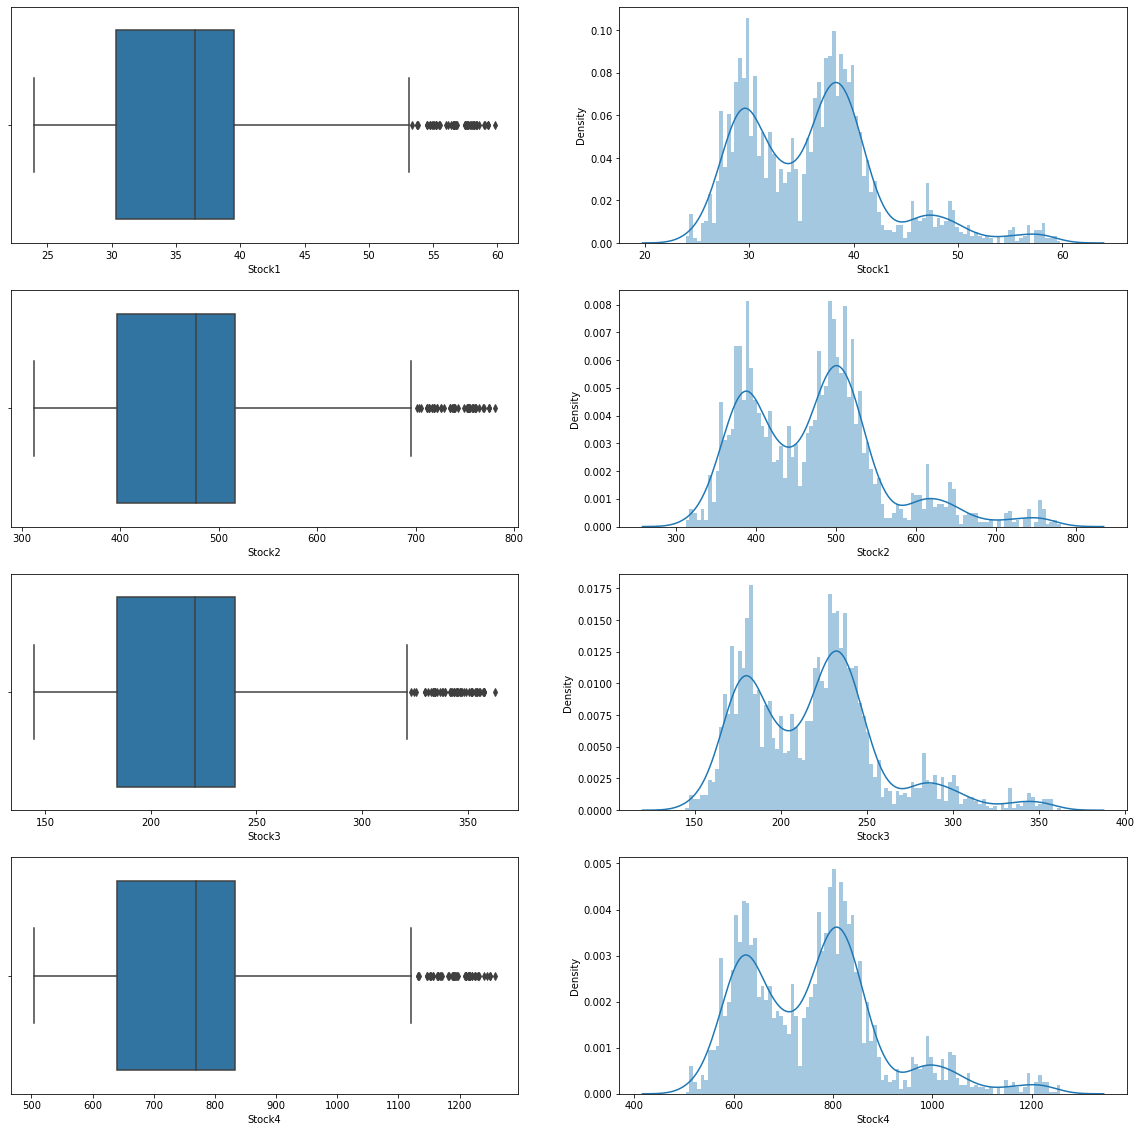

In [45]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,20)

sns.boxplot(df1['Stock1'], ax=axes[0][0], x = "Stock1: Price")
sns.distplot(df1['Stock1'], ax=axes[0][1], bins = 100) 

sns.boxplot(df1['Stock2'], ax=axes[1][0])
sns.distplot(df1['Stock2'], ax=axes[1][1], bins = 100)

sns.boxplot(df1['Stock3'], ax=axes[2][0])
sns.distplot(df1['Stock3'], ax=axes[2][1], bins = 100)

sns.boxplot(df1['Stock4'], ax=axes[3][0])
sns.distplot(df1['Stock4'], ax=axes[3][1], bins = 100)


### Plot a boxplot to understand the spread of Stock1 Sales different years and within different months across years.

## Yearly Boxplot¶

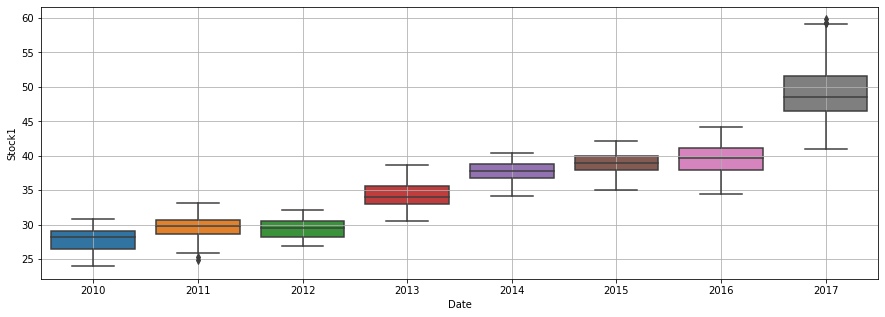

In [46]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
sns.boxplot(x = df1.index.year,y = df1['Stock1'])
plt.grid();

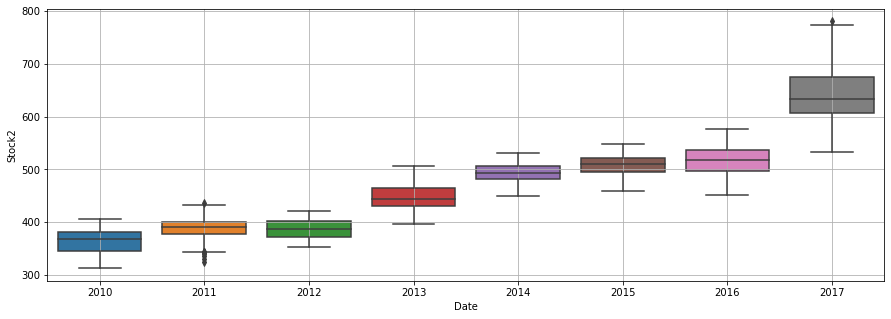

In [47]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
sns.boxplot(x = df1.index.year,y = df1['Stock2'])
plt.grid();

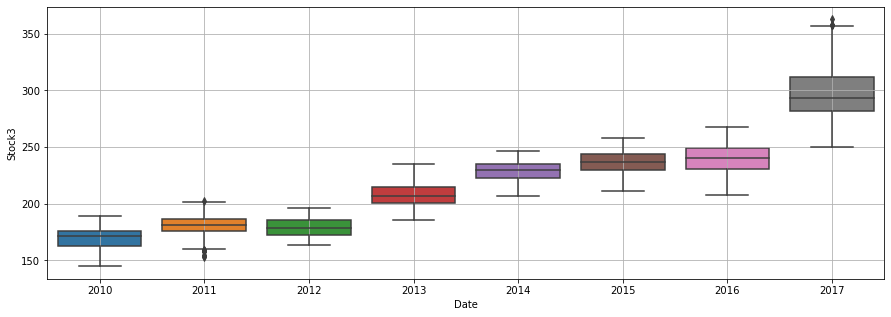

In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
sns.boxplot(x = df1.index.year,y = df1['Stock3'])
plt.grid();

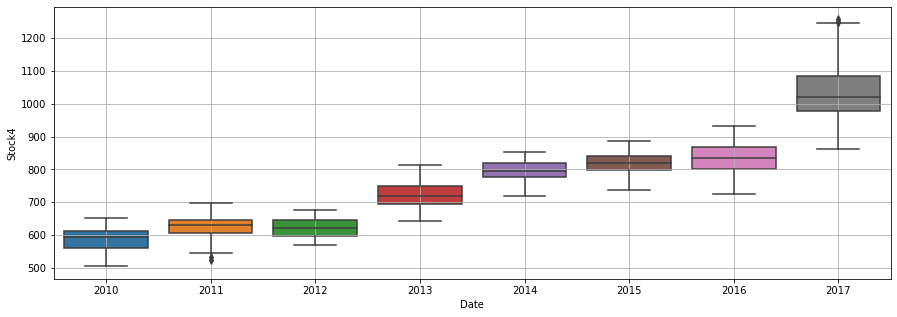

In [49]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
sns.boxplot(x = df1.index.year,y = df1['Stock4'])
plt.grid();

The yearly boxplots also shows that Stock1 Sales have been fluctulating little over the years but no major change in that. 1995 sales looks down, the least in the graph but it is not full year sales. it is only till July-1995. Every year has one or two outliers, may be because every year has seen one or two outstanding months for sales activity. Year 1995 is an exception here, as data is not for the full year.

## Monthly Plot

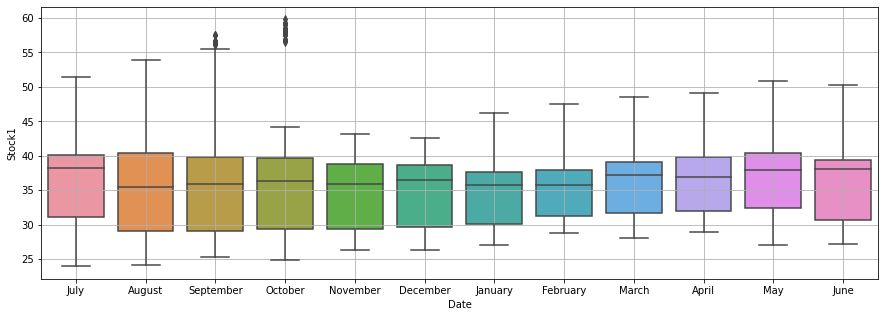

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
sns.boxplot(x = df1.index.month_name(),y = df1['Stock1'])
plt.grid();

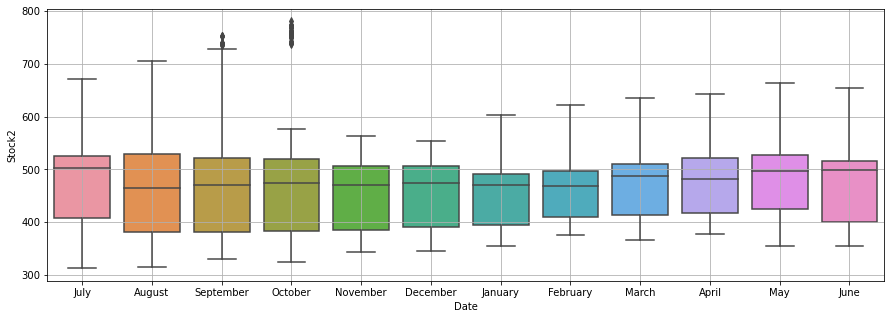

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
sns.boxplot(x = df1.index.month_name(),y = df1['Stock2'])
plt.grid();

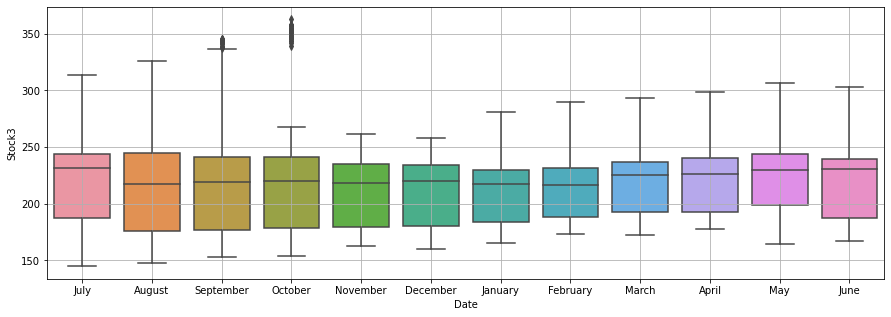

In [52]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
sns.boxplot(x = df1.index.month_name(),y = df1['Stock3'])
plt.grid();

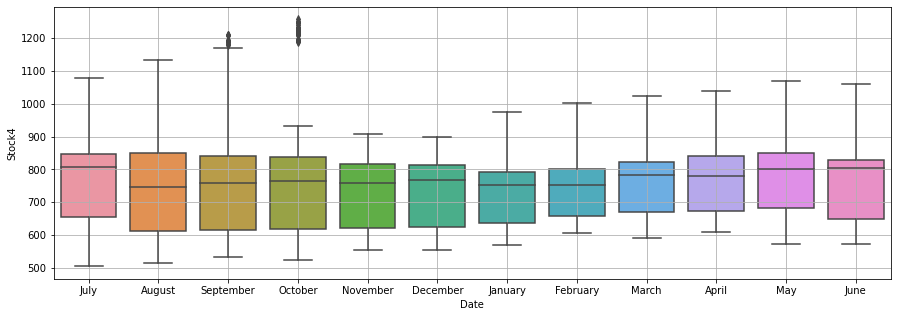

In [53]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
sns.boxplot(x = df1.index.month_name(),y = df1['Stock4'])
plt.grid();

Monthly plot reveals a lot about sales patters on Stock1. Last 3 to 4 months got prominance in sales increment every year. Rest all other months sales data have been going bit up & down, while June month is showing the least sales volume. Few outliers, January month has an outlier with the lower sales volumn, while February & July months have one outstanding sales year comparing sales volumns in these months.

### Plot a time series monthplot to understand the spread of Stock1 Sales across different years and within different months across years.¶

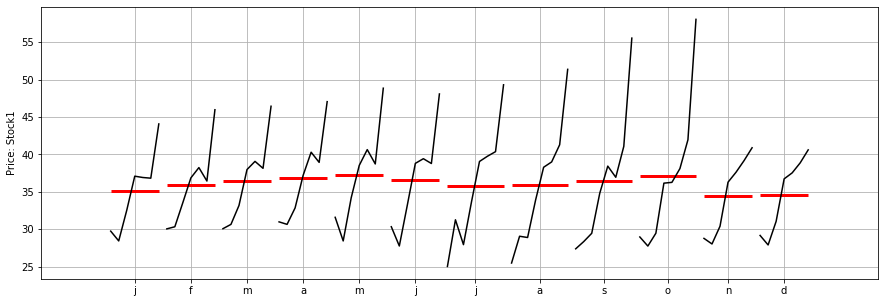

In [54]:
# from statsmodels.graphics.tsaplots import month_plot

# month_plot(df_1['Stock1'],ylabel='Sales')
# plt.grid();


from statsmodels.graphics.tsaplots import month_plot
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
month_plot(df1['Stock1'].resample('M').mean(),ylabel='Price: Stock1')
plt.grid();

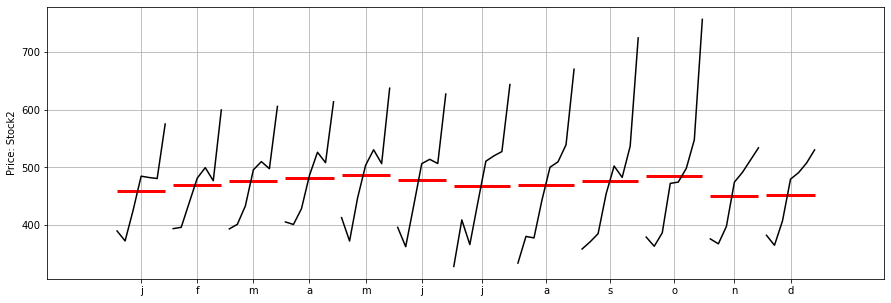

In [55]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
month_plot(df1['Stock2'].resample('M').mean(),ylabel='Price: Stock2')
plt.grid();

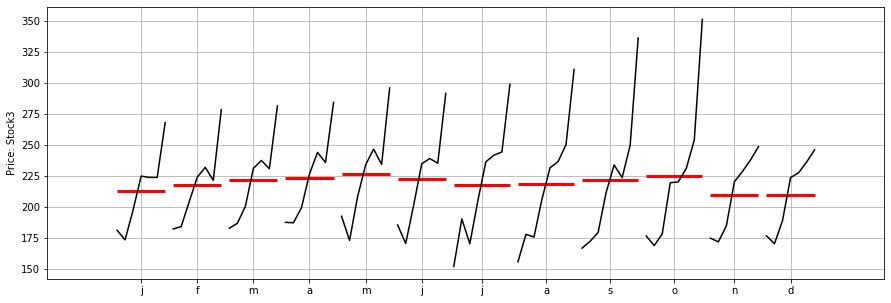

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
month_plot(df1['Stock3'].resample('M').mean(),ylabel='Price: Stock3')
plt.grid();

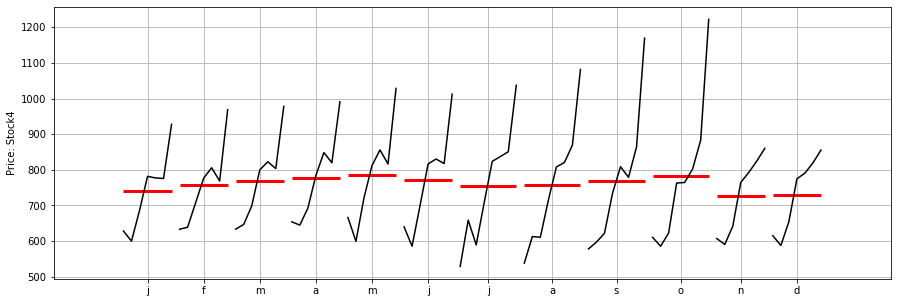

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
month_plot(df1['Stock4'].resample('M').mean(),ylabel='Price: Stock4')
plt.grid();

This plot shows us the behaviour of the Time Series across various months. The red line is the median value. Median sales of last three months is constantly increasing, giving an impression of seasonality in the data.

## Decomposition Graph
A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

Level: The average value in the series. Trend: The increasing or decreasing value in the series. Seasonality: The repeating short-term cycle in the series. Noise: The random variation in the series.

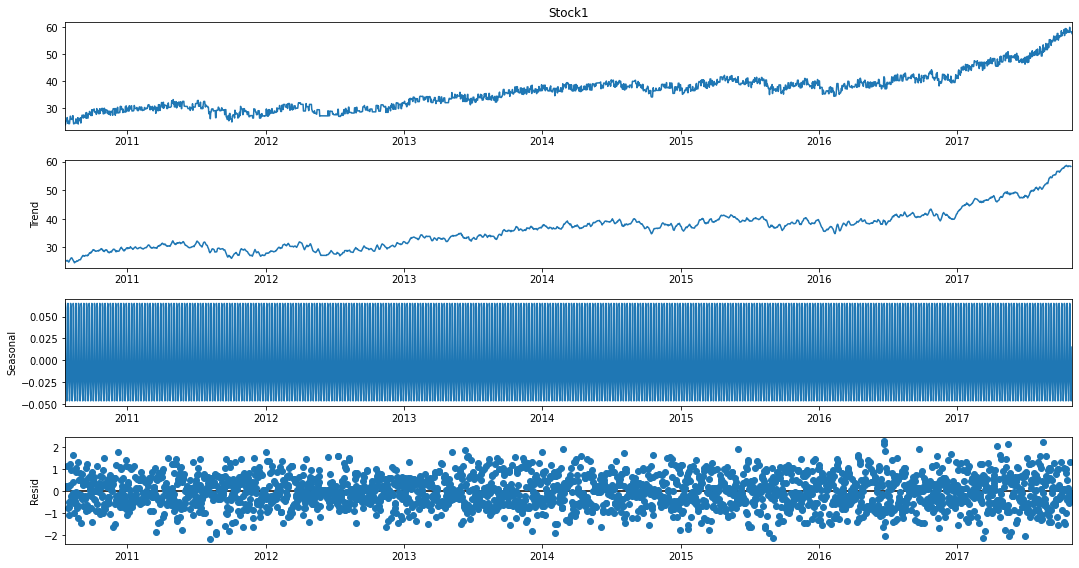

In [58]:
rcParams['figure.figsize'] = 15,8
decomposition_a1 = seasonal_decompose(df1['Stock1'], model='additive')
decomposition_a1.plot();

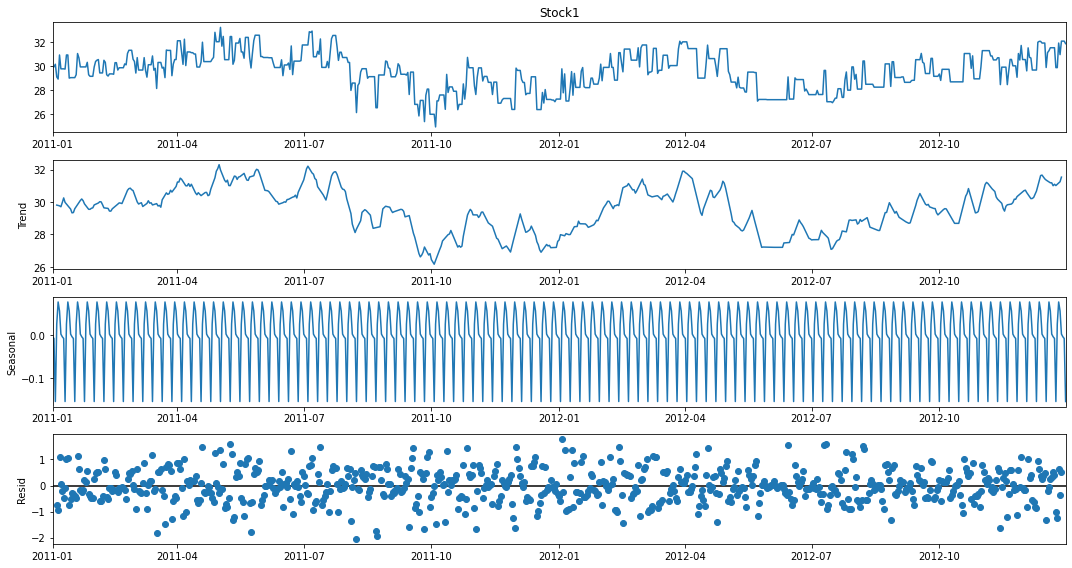

In [59]:
# Decomposition of Stock1 in a short time period ['1/1/2011' : '31/12/2012'].

rcParams['figure.figsize'] = 15,8
decomposition_a1 = seasonal_decompose(df1['Stock1']['1/1/2011' : '31/12/2012'], model='additive')
decomposition_a1.plot();

# ['1/1/2011' : '31/12/2011']

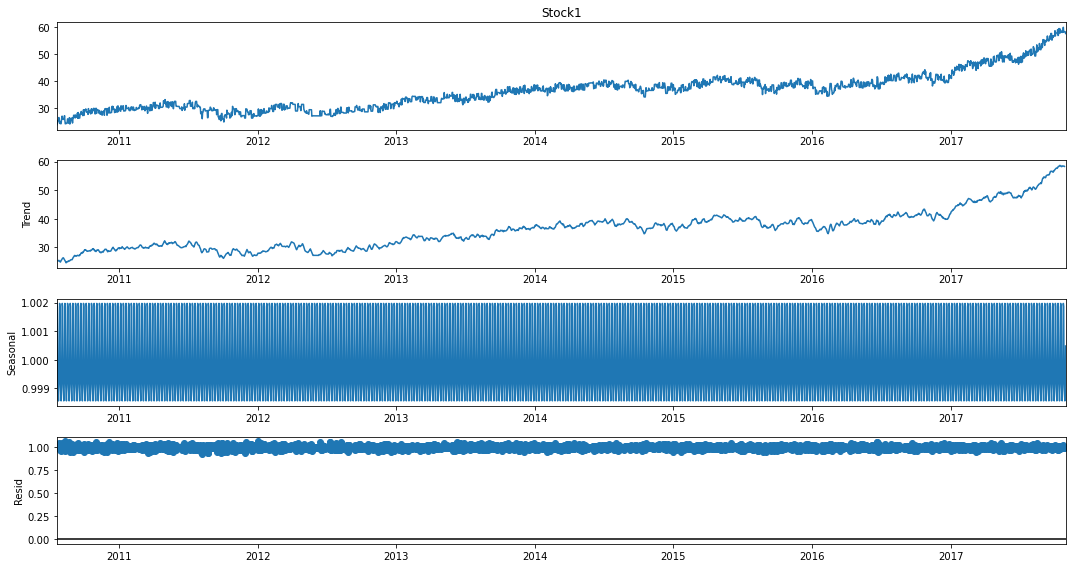

In [60]:
rcParams['figure.figsize'] = 15,8
decomposition_m1 = seasonal_decompose(df1['Stock1'], model='multiplicative')
decomposition_m1.plot();

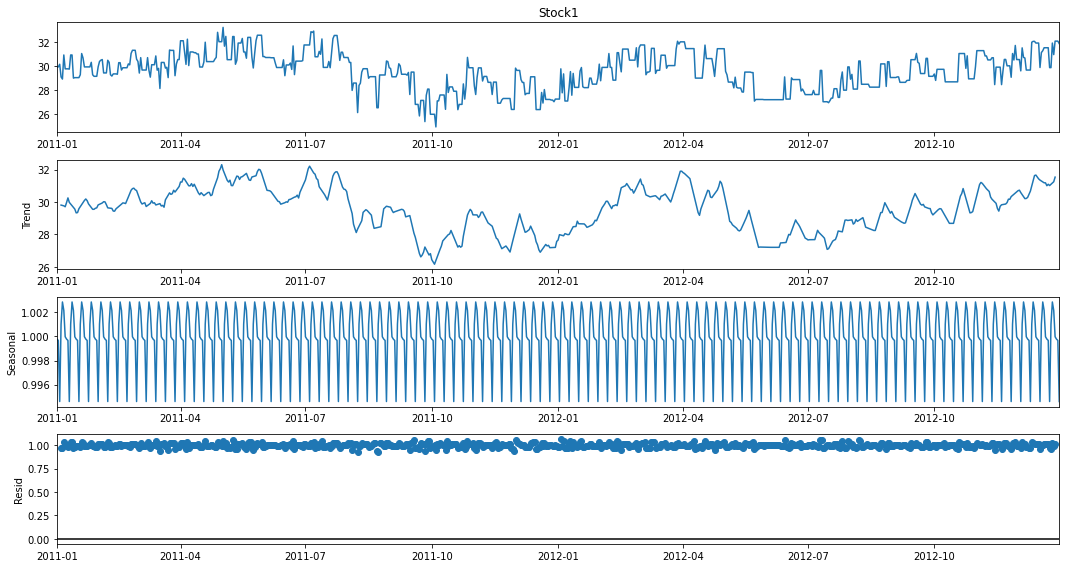

In [61]:
# Decomposition of Stock1 in a short time period ['1/1/2011' : '31/12/2012'].

rcParams['figure.figsize'] = 15,8
decomposition_m1 = seasonal_decompose(df1['Stock1']['1/1/2011' : '31/12/2012'], model='multiplicative')
decomposition_m1.plot();

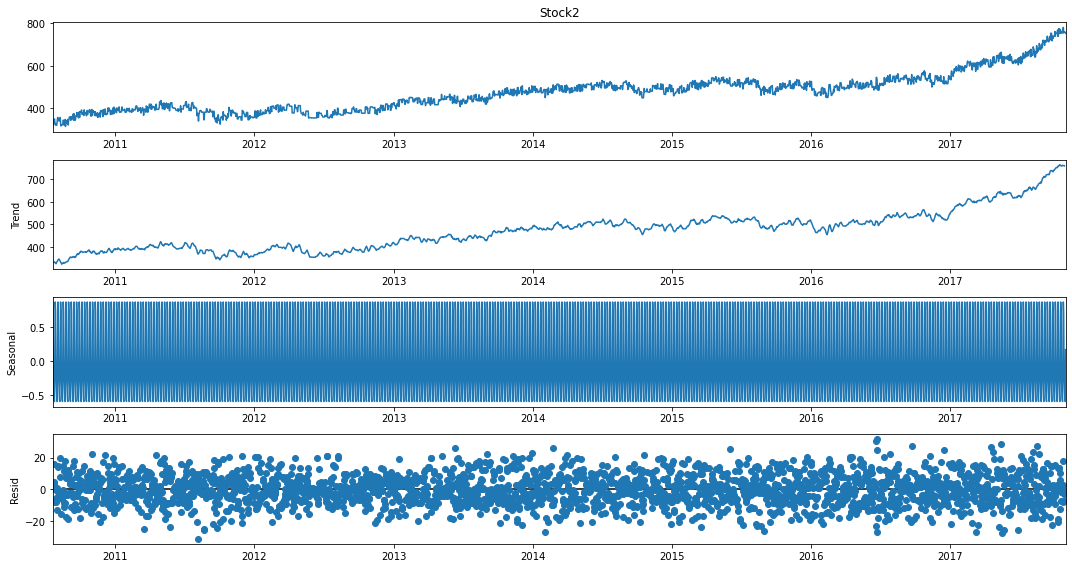

In [62]:
rcParams['figure.figsize'] = 15,8
decomposition_a1 = seasonal_decompose(df1['Stock2'], model='additive')
decomposition_a1.plot();

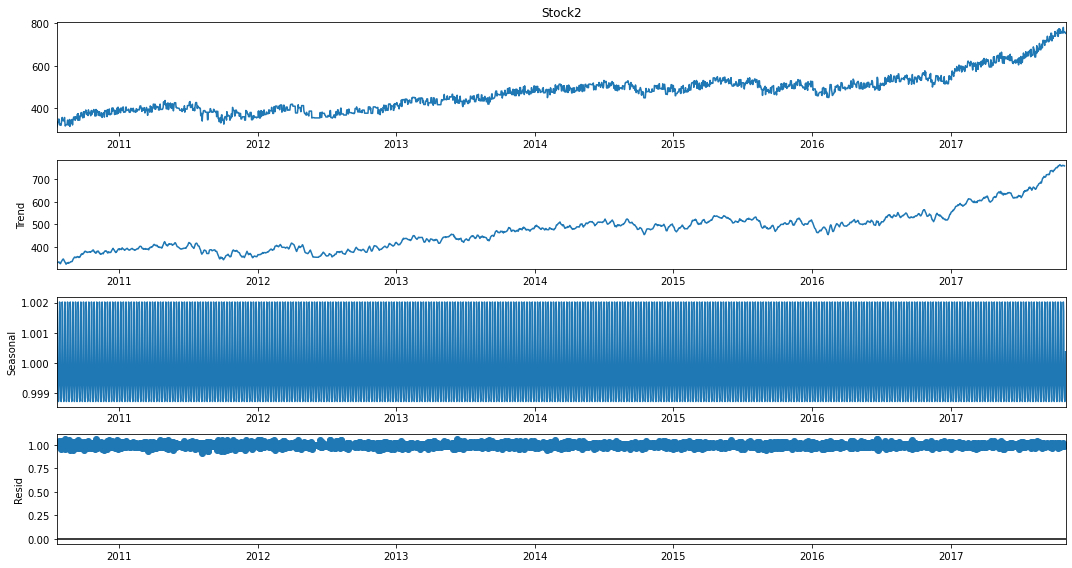

In [63]:
rcParams['figure.figsize'] = 15,8
decomposition_m1 = seasonal_decompose(df1['Stock2'], model='multiplicative')
decomposition_m1.plot();

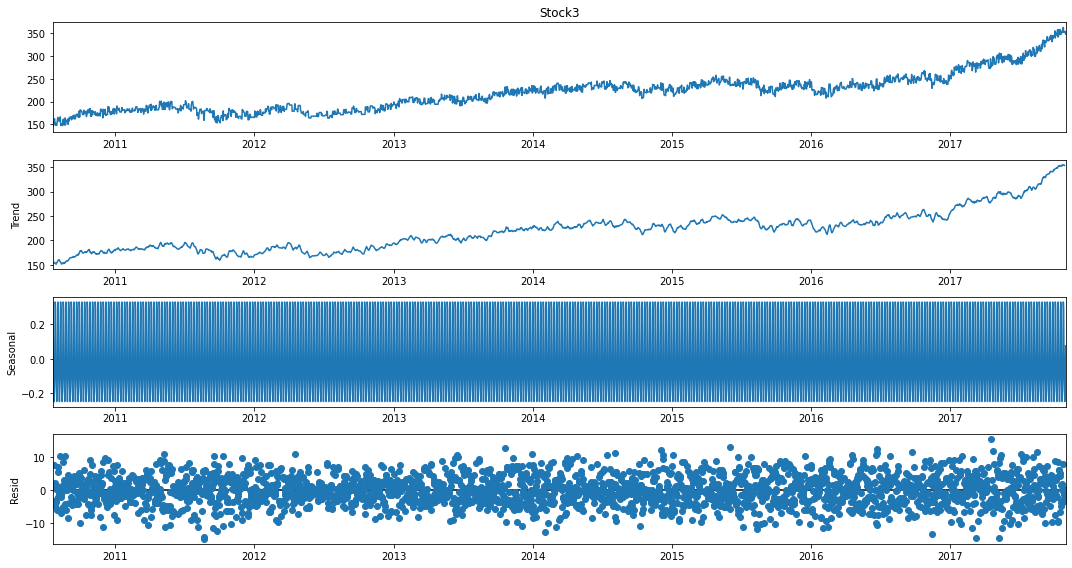

In [64]:
rcParams['figure.figsize'] = 15,8
decomposition_a1 = seasonal_decompose(df1['Stock3'], model='additive')
decomposition_a1.plot();

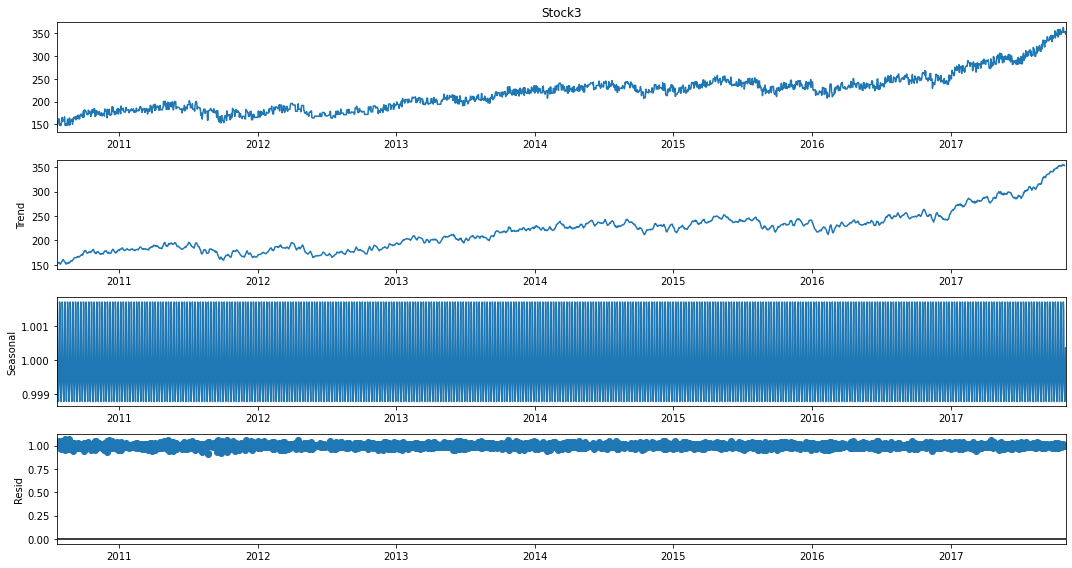

In [65]:
rcParams['figure.figsize'] = 15,8
decomposition_m1 = seasonal_decompose(df1['Stock3'], model='multiplicative')
decomposition_m1.plot();

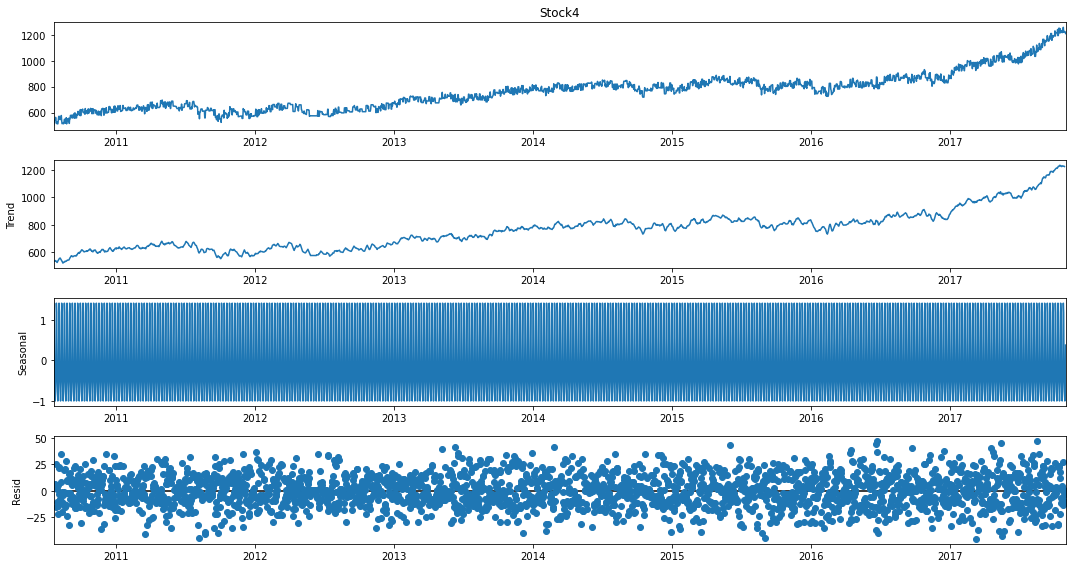

In [66]:
rcParams['figure.figsize'] = 15,8
decomposition_a1 = seasonal_decompose(df1['Stock4'], model='additive')
decomposition_a1.plot();

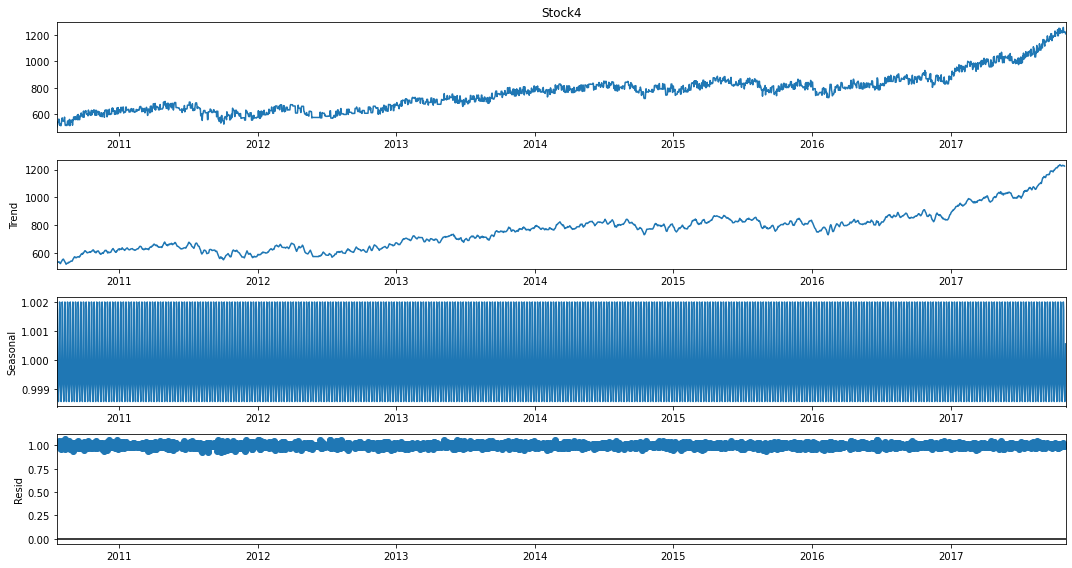

In [67]:
rcParams['figure.figsize'] = 15,8
decomposition_m1 = seasonal_decompose(df1['Stock4'], model='multiplicative')
decomposition_m1.plot();

## Train and Test data split
inference on train and test data for trend and seasonality from visual point of view.

In [68]:
train = pd.read_excel('Stock Market- continous dates_1.xlsx', parse_dates=True, index_col='Date', sheet_name = 'train')
train

,Stock1,Stock2,Stock3,Stock4
Date,,,,
2010-07-21,23.94,312.22,144.64,503.74
2010-07-22,24.48,319.24,146.88,518.08
2010-07-23,25.50,335.50,155.00,540.50
2010-07-24,25.50,335.50,155.00,540.50
2010-07-25,25.50,335.50,155.00,540.50
...,...,...,...,...
2017-09-27,56.71,739.23,344.26,1190.91
2017-09-28,56.02,728.26,338.12,1180.42
2017-09-29,56.60,738.80,343.60,1191.60


In [69]:
test = pd.read_excel('Stock Market- continous dates_1.xlsx', parse_dates=True, index_col='Date', sheet_name = 'test')
test

,Stock1,Stock2,Stock3,Stock4
Date,,,,
2017-10-02,56.75,738.75,345.50,1195.75
2017-10-03,58.53,760.89,355.18,1230.13
2017-10-04,56.57,739.41,339.42,1189.97
2017-10-05,57.59,748.67,350.54,1209.39
2017-10-06,57.71,753.23,346.26,1215.91
2017-10-07,57.71,753.23,346.26,1215.91
2017-10-08,57.71,753.23,346.26,1215.91
2017-10-09,57.71,754.23,351.26,1214.91
2017-10-10,58.94,768.22,357.64,1240.74


In [70]:
print('Training data - rows & columns:', train.shape)
print('\n')
print('Testing data - rows & columns:', test.shape)
print('\n')
print('Full data (training + testing) - rows & columns:', df1.shape)

Training data - rows & columns: (2630, 4)


Testing data - rows & columns: (30, 4)


Full data (training + testing) - rows & columns: (2660, 4)


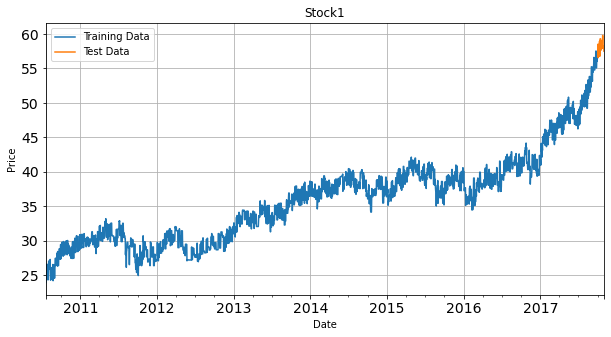

In [71]:
train['Stock1'].plot(figsize=(10,5), fontsize=14, title = 'Stock1', xlabel = 'Year', ylabel = 'Price')
test['Stock1'].plot(figsize=(10,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

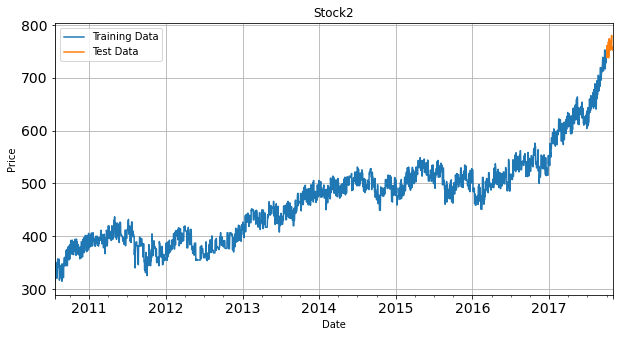

In [72]:
train['Stock2'].plot(figsize=(10,5), fontsize=14, title = 'Stock2', xlabel = 'Year', ylabel = 'Price')
test['Stock2'].plot(figsize=(10,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

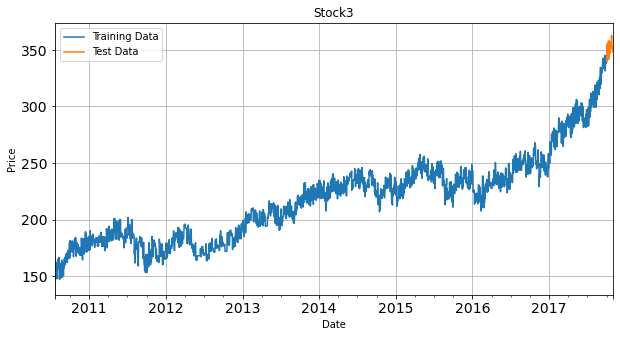

In [73]:
train['Stock3'].plot(figsize=(10,5), fontsize=14, title = 'Stock3', xlabel = 'Year', ylabel = 'Price')
test['Stock3'].plot(figsize=(10,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

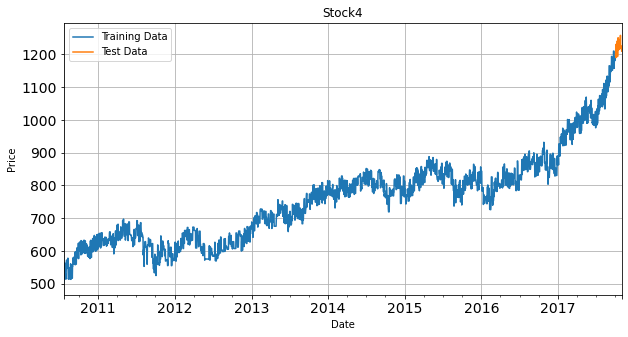

In [74]:
train['Stock4'].plot(figsize=(10,5), fontsize=14, title = 'Stock4', xlabel = 'Year', ylabel = 'Price')
test['Stock4'].plot(figsize=(10,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

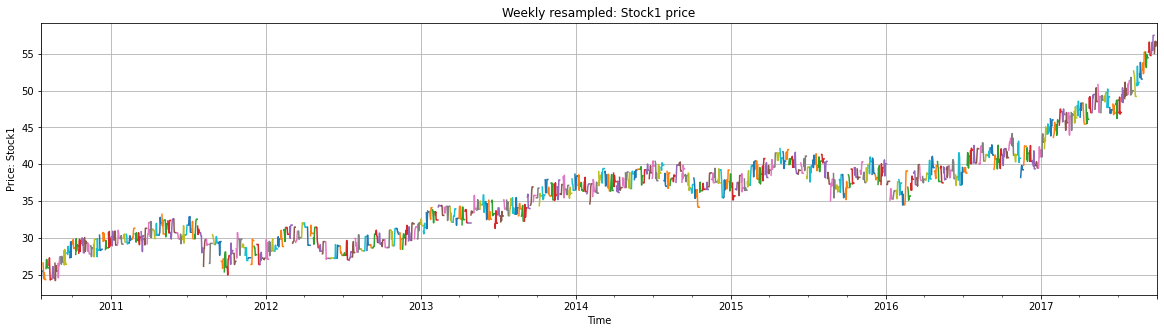

In [75]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,5
train['Stock1'].resample('W').plot(title = 'Weekly resampled: Stock1 price', ylabel= 'Price: Stock1', xlabel = 'Time')
plt.grid();

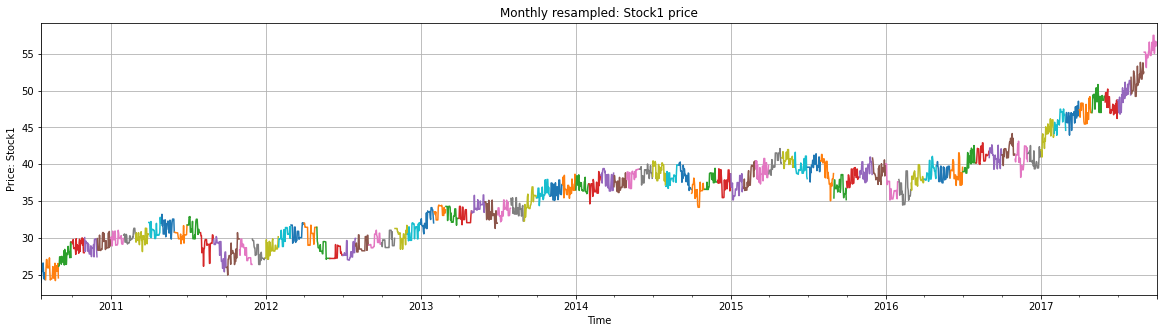

In [76]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,5
train['Stock1'].resample('M').plot(title = 'Monthly resampled: Stock1 price', ylabel= 'Price: Stock1', xlabel = 'Time')
plt.grid();

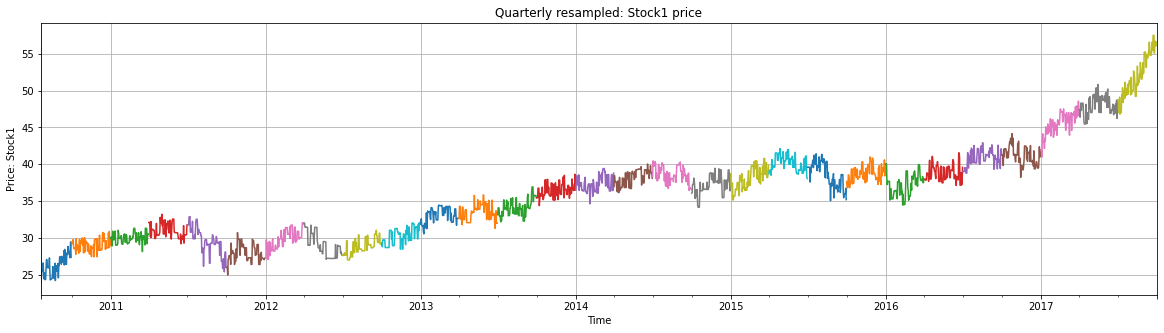

In [77]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,5
train['Stock1'].resample('Q').plot(title = 'Quarterly resampled: Stock1 price', ylabel= 'Price: Stock1', xlabel = 'Time')
plt.grid();

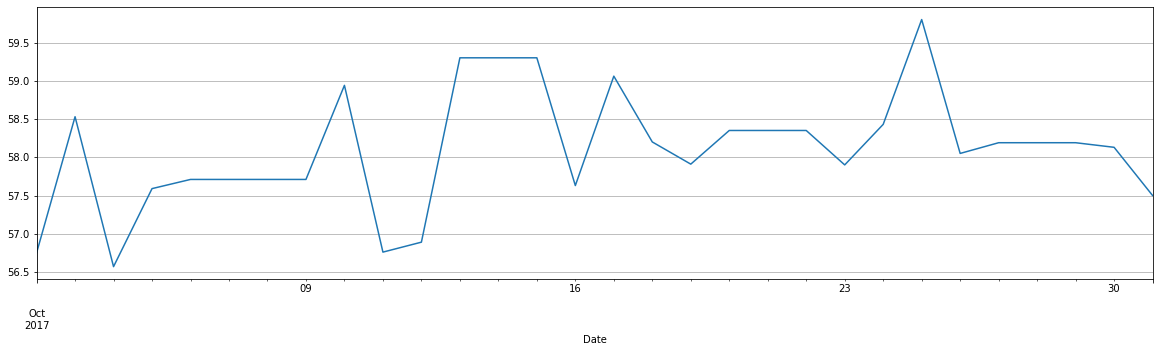

In [78]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,5
test['Stock1'].plot()
plt.grid();

## Simple Exponential Smoothing, Holt's Model (Double Exponential Smoothing) & Holt-Winter's Model (Triple Exponential Smoothing)


In [79]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [80]:
SES1_train = train['Stock1'].copy()
SES1_test = test['Stock1'].copy()

In [81]:
# create class/ Initialize 
model_SES1 = SimpleExpSmoothing(train['Stock1'],initialization_method='estimated')

C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [82]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES1_autofit = model_SES1.fit(optimized=True)

In [83]:
## Let us check the parameters

model_SES1_autofit.params

{'smoothing_level': 0.5266599914432556,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 24.433255571799005,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

**Here, Python has optimized the smoothing level to be almost 1.**

In [84]:
# Using the fitted model on the training set to forecast on the test set

SES1_test['predict'] = model_SES1_autofit.forecast(steps=30)
pd.options.display.float_format = '{:.2f}'.format
SES1_test['predict'].head().to_frame()

,0
2017-10-02,56.56
2017-10-03,56.56
2017-10-04,56.56
2017-10-05,56.56
2017-10-06,56.56


In [85]:
SES1_test['predict'].shape

(30,)

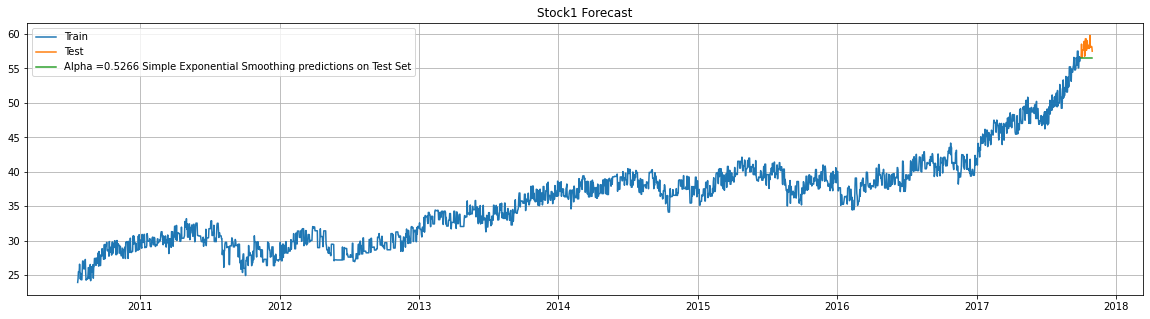

In [86]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['Stock1'], label='Train')
plt.plot(test['Stock1'], label='Test')

plt.plot(SES1_test['predict'], label='Alpha =0.5266 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Stock1 Forecast');

In [87]:
print('SES1 RMSE:',mean_squared_error(test['Stock1'].values,SES1_test['predict'].values,squared=False))


SES1 RMSE: 1.7270093435702796


In [88]:
#different way to calculate RMSE
# print('SES1 RMSE (calculated using statsmodels):',em.rmse(test['Stock1'].values,SES1_predict.values)[0])

In [89]:
resultsDf = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Stock1'].values, 
                         SES1_test['predict'].values, squared=False)]},
                         index=['SES Auto fit, Stock1, Alpha=0.5266'])
resultsDf

,Test RMSE
"SES Auto fit, Stock1, Alpha=0.5266",1.73


In [90]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [91]:
# for i in np.arange(0.3,0.9,0.1):
#     model_SES1_alpha_i = model_SES1.fit(smoothing_level=i, optimized=False, use_brute=True)
#     SES1_train['predict',i] = model_SES1_alpha_i.fittedvalues
#     SES1_test['predict',i] = model_SES1_alpha_i.forecast(steps=len(test))
    
#     rmse_model5_train_i = metrics.mean_squared_error(SES1_train['Stock1'],SES1_train['predict',i],squared=False)
    
#     rmse_model5_test_i = metrics.mean_squared_error(SES1_test['Stock1'],SES1_test['predict',i],squared=False)
    
#     resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
#                                       ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

## Model Evaluation

In [92]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE


In [93]:
# ## Plotting on both the Training and Test data

# plt.figure(figsize=(18,9))
# plt.plot(SES1_train, label='Train')
# plt.plot(SES1_test, label='Test')

# plt.plot(SES1_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

# plt.plot(SES1_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')



# plt.legend(loc='best')
# plt.grid();

In [94]:
# resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
#                            ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_6_1])
# resultsDf

In [95]:
# ## Mean Absolute Percentage Error (MAPE) - Function Definition

# def MAPE(y_true, y_pred):
#     return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [96]:
# def mape(actual, pred): 
#     actual, pred = np.array(actual), np.array(pred)
#     return np.mean(np.abs((actual - pred) / actual)) * 100

# mape = mape(df1['Stock1'],df1.fittedvalues)

# print('MAPE:', mape)

In [97]:
# def mape(actual, pred): 
#     actual, pred = np.array(actual), np.array(pred)
#     return np.mean(np.abs((actual - pred) / actual)) * 100

# mape = mape(df1['Stock1'],df1.fittedvalues)

# print('MAPE:', mape)

## Holt - ETS(A, A, N) - Holt's linear method with additive errors.
## Double Exponential Smoothing.
One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
Applicable when data has Trend but no seasonality.
Two separate components are considered: Level and Trend.
Level is the local mean.
One smoothing parameter α corresponds to the level series
A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

Intercept or Level equation,  𝐿𝑡  is given by:  𝐿𝑡=𝛼𝑌𝑡+(1−𝛼)𝐹𝑡 

Trend equation is given by  𝑇𝑡=𝛽(𝐿𝑡−𝐿𝑡−1)+(1−𝛽)𝑇𝑡−1 

Here,  𝛼  and  𝛽  are the smoothing constants for level and trend, respectively,

0 < 𝛼  < 1 and 0 <  𝛽  < 1.
The forecast at time t + 1 is given by

𝐹𝑡+1=𝐿𝑡+𝑇𝑡 
𝐹𝑡+𝑛=𝐿𝑡+𝑛𝑇𝑡 


In [99]:
# Initializing the Double Exponential Smoothing Model
model_DES1 = Holt(train['Stock1'],initialization_method='estimated')
# Fitting the model
model_DES1 = model_DES1.fit()

print('')
print('==Double Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES1.params)


==Double Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5248597223418211, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 24.412940385498917, 'initial_trend': 0.012227083416483982, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [100]:
# Forecasting using this model for the duration of the test set
DES1_predict =  model_DES1.forecast(len(test))
DES1_predict.head(10).to_frame()

,0
2017-10-02,56.58
2017-10-03,56.59
2017-10-04,56.61
2017-10-05,56.62
2017-10-06,56.63
2017-10-07,56.64
2017-10-08,56.66
2017-10-09,56.67
2017-10-10,56.68
2017-10-11,56.69


In [101]:
# ## Plotting the Training data, Test data and the forecasted values

# plt.plot(train['Stock1'], label='Train')
# plt.plot(test['Stock1'], label='Test')

# plt.plot(SES1_predict, label='Alpha=0.5266:Simple Exponential Smoothing predictions on Test Set')
# plt.plot(DES1_predict, label='Alpha=0.5248,Beta=0.0000:Double Exponential Smoothing predictions on Test Set')

# plt.legend(loc='best')
# plt.grid()
# plt.title('Simple and Double Exponential Smoothing Forecast');

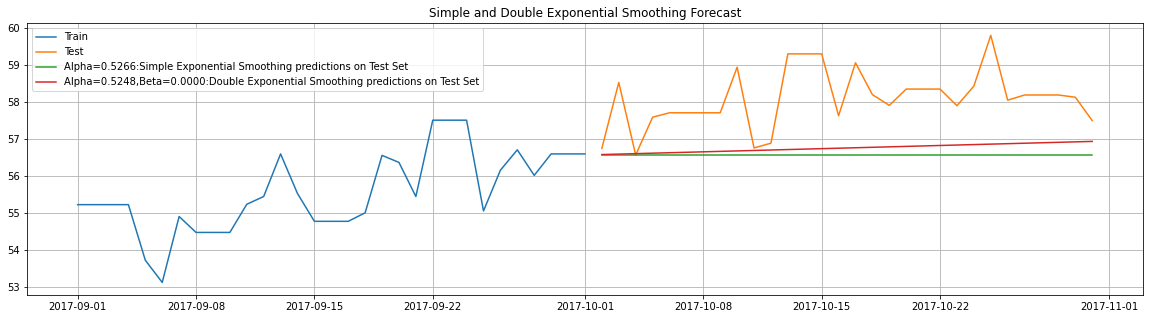

In [102]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['Stock1']['2017-09-01' : '2017-11-30'], label='Train')
plt.plot(test['Stock1'], label='Test')

plt.plot(SES1_test['predict'], label='Alpha=0.5266:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES1_predict, label='Alpha=0.5248,Beta=0.0000:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Forecast');

**We see that the double exponential smoothing is picking up the trend component along with the level component as well.**

In [103]:
print('DES1 RMSE:',mean_squared_error(test['Stock1'].values,DES1_predict.values,squared=False))

DES1 RMSE: 1.5376142555411774


In [104]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Stock1'].values,DES1_predict.values,squared=False)]}
                           ,index=['Alpha=0.5248,Beta=0.0000:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"SES Auto fit, Stock1, Alpha=0.5266",1.73
"Alpha=0.5248,Beta=0.0000:DES",1.54


### Inference
Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors¶

In [105]:
# Initializing the Triple Exponential Smoothing Model
model_TES1 = ExponentialSmoothing(train['Stock1'],trend='additive',seasonal='additive',
                                 seasonal_periods = 5, initialization_method='estimated')
# Fitting the model
model_TES1 = model_TES1.fit()

print('')
print('==Triple Exponential Smoothing Estimated Parameters with additive seasonality ==')
print('')
print(model_TES1.params)

C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)



==Triple Exponential Smoothing Estimated Parameters with additive seasonality ==

{'smoothing_level': 0.5255780662402392, 'smoothing_trend': 3.9933485382006734e-08, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 24.608853873692865, 'initial_trend': 0.012221689043970146, 'initial_seasons': array([-0.21404147, -0.15844145, -0.20070738, -0.19449725, -0.17972184]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [106]:
# Forecasting using this model for the duration of the test set
TES1_predict =  model_TES1.forecast(len(test))
TES1_predict.head(10).to_frame()

,0
2017-10-02,56.55
2017-10-03,56.62
2017-10-04,56.59
2017-10-05,56.61
2017-10-06,56.64
2017-10-07,56.62
2017-10-08,56.68
2017-10-09,56.65
2017-10-10,56.67
2017-10-11,56.70


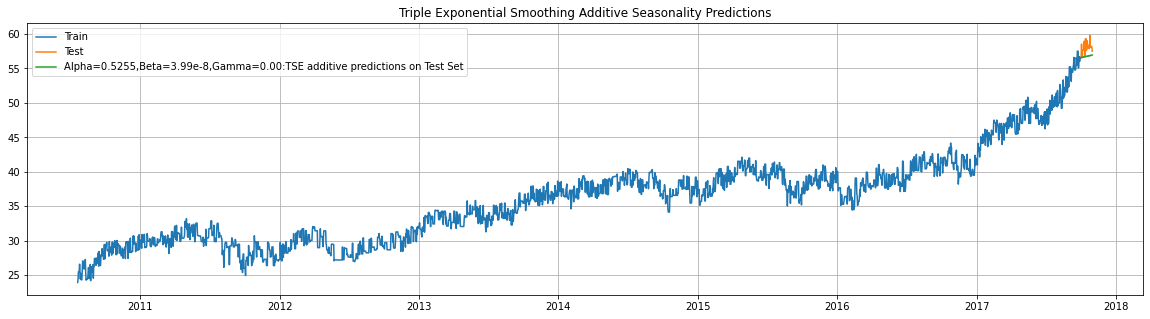

In [107]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['Stock1'], label='Train')
plt.plot(test['Stock1'], label='Test')

# plt.plot(SES1_predict, label='Alpha=0.5266:Simple Exponential Smoothing predictions on Test Set')
# plt.plot(DES1_predict, label='Alpha=0.5248,Beta=0.0000:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES1_predict, label='Alpha=0.5255,Beta=3.99e-8,Gamma=0.00:TSE additive predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Additive Seasonality Predictions');

**We see that the Triple Exponential Smoothing is picking up the seasonal component as well.**

In [108]:
print('TES1 additive RMSE:',mean_squared_error(test['Stock1'].values,TES1_predict.values,squared=False))

TES1 additive RMSE: 1.5401135419742638


In [109]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Stock1'].values,TES1_predict.values,squared=False)]}
                           ,index=['Alpha=0.52,Beta=3.99e-8,Gamma=0.00:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"SES Auto fit, Stock1, Alpha=0.5266",1.73
"Alpha=0.5248,Beta=0.0000:DES",1.54
"Alpha=0.52,Beta=3.99e-8,Gamma=0.00:TES",1.54


### Inference
Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.



## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

ETS(A, A, M) model

In [110]:
# Initializing the Double Exponential Smoothing Model
model_TES_am1 = ExponentialSmoothing(train['Stock1'],trend='add',seasonal='multiplicative',
                                    seasonal_periods = 5, initialization_method='estimated')
# Fitting the model
model_TES_am1 = model_TES_am1.fit()

print('')
print('==Triple Exponential Smoothing Estimated Parameters with multiplicative seasonality ==')
print('')
print(model_TES_am1.params)

C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)



==Triple Exponential Smoothing Estimated Parameters with multiplicative seasonality ==

{'smoothing_level': 0.5255567390004827, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 22.172663490745542, 'initial_trend': 0.01110007765534157, 'initial_seasons': array([1.10045418, 1.10217112, 1.10081899, 1.100763  , 1.10126632]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [111]:
# Forecasting using this model for the duration of the test set
TES_predict_am1 =  model_TES_am1.forecast(len(test))
TES_predict_am1.head(10).to_frame()

,0
2017-10-02,56.55
2017-10-03,56.65
2017-10-04,56.59
2017-10-05,56.60
2017-10-06,56.64
2017-10-07,56.61
2017-10-08,56.71
2017-10-09,56.65
2017-10-10,56.66
2017-10-11,56.70


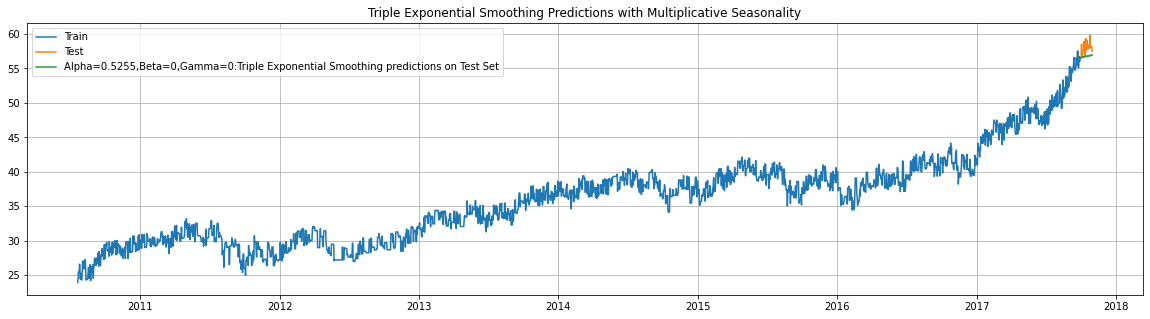

In [112]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['Stock1'], label='Train')
plt.plot(test['Stock1'], label='Test')

# plt.plot(SES1_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
# plt.plot(DES1_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
# plt.plot(TES1_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am1, label='Alpha=0.5255,Beta=0,Gamma=0:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions with Multiplicative Seasonality');

### Report model accuracy¶

In [113]:
print('TES_am1 RMSE:',mean_squared_error(test['Stock1'].values,TES_predict_am1.values,squared=False))

TES_am1 RMSE: 1.5377064311395254


In [114]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Stock1'].values,TES_predict_am1.values,squared=False)]}
                           ,index=['Alpha=0.5255,Beta=0,Gamma=0:TES Multiplicative'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"SES Auto fit, Stock1, Alpha=0.5266",1.73
"Alpha=0.5248,Beta=0.0000:DES",1.54
"Alpha=0.52,Beta=3.99e-8,Gamma=0.00:TES",1.54
"Alpha=0.5255,Beta=0,Gamma=0:TES Multiplicative",1.54


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set.

## Check for stationarity
### Dickey-Fuller Test:
H0: Series is NOT Stationary\
H1: Series is Stationary

In [115]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

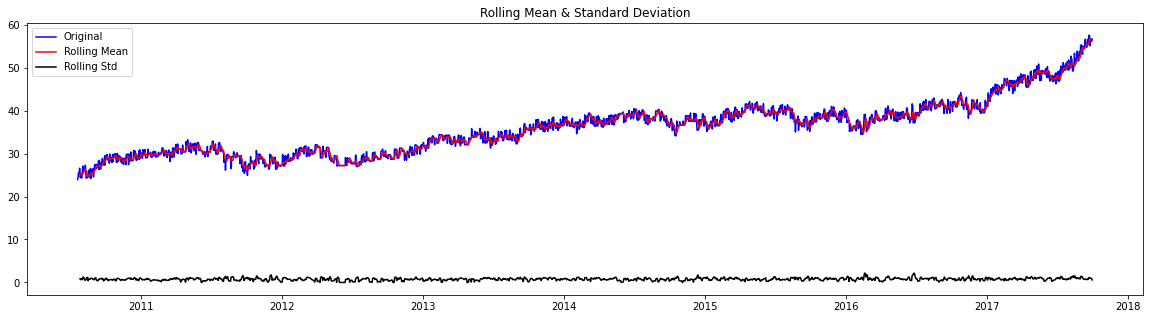

Results of Dickey-Fuller Test:
Test Statistic                   1.14
p-value                          1.00
#Lags Used                      27.00
Number of Observations Used   2602.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64 



In [116]:
test_stationarity(train['Stock1']) # Stationarity on train dataset.

**p-value is more than 0.05, H0 is failed to reject which means TS is not stationary.\
We will take a difference of order 1 and check whether the Time Series is stationary or not.**

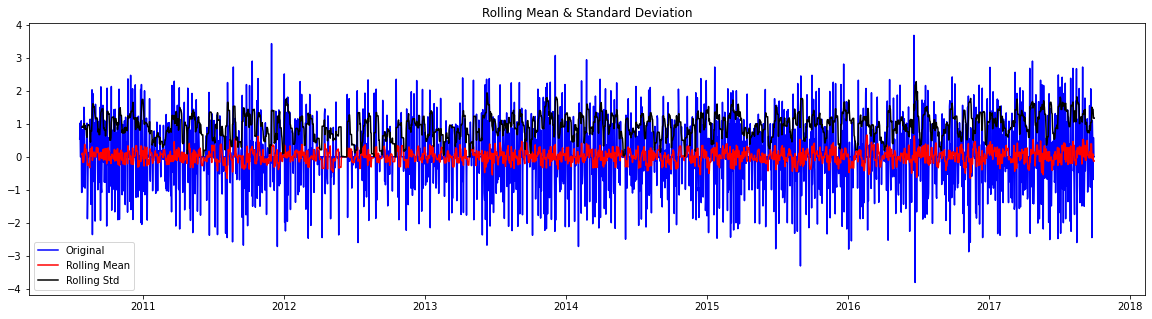

Results of Dickey-Fuller Test:
Test Statistic                 -12.65
p-value                          0.00
#Lags Used                      26.00
Number of Observations Used   2602.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64 



In [117]:
test_stationarity(train['Stock1'].diff().dropna())

**With differencing (d=1), p-value is much lower than 0.05, thus rejecting H0 this time; means, now our TS has got stationary and we can build ARIMA/ SARIMA model.**

#### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.


## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

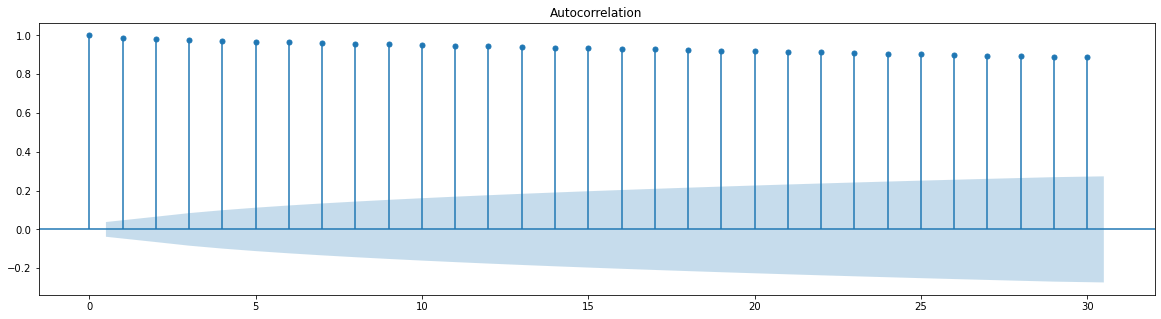

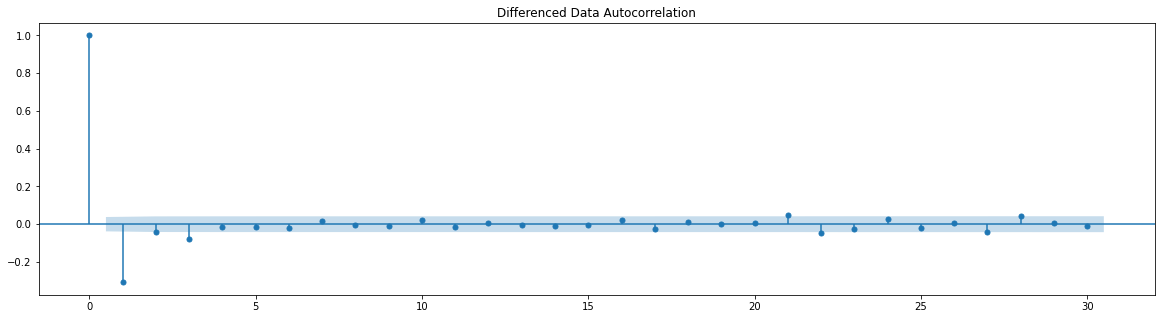

In [119]:
plot_acf(df1['Stock1'],lags=30)
plot_acf(df1['Stock1'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

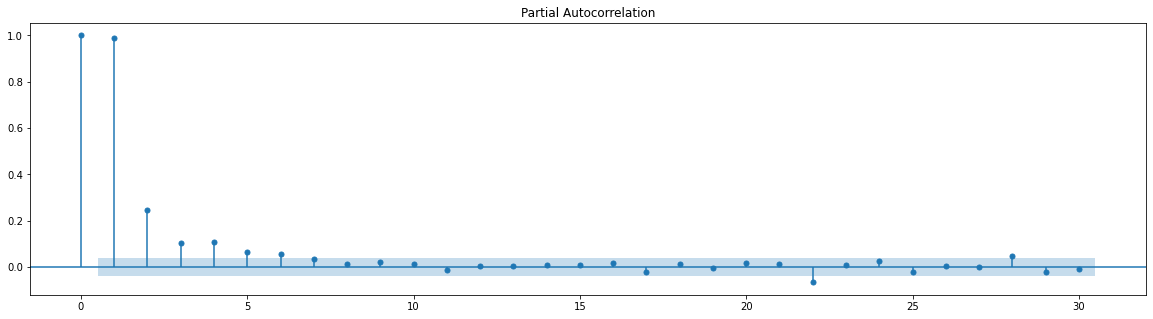

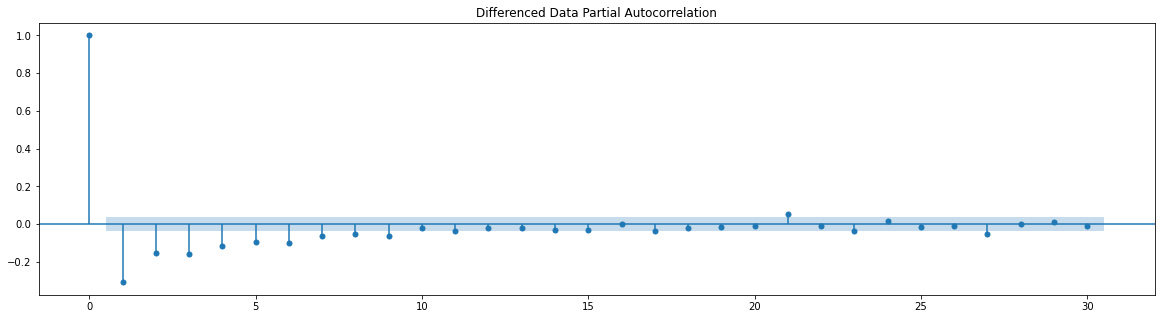

In [120]:
plot_pacf(df1['Stock1'],lags=30)
plot_pacf(df1['Stock1'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

**From the above plots, we can say that there seems to be a seasonality in the data.**

In [121]:
# Train and Test data details:

print('First few rows of Training Data')
display(train.head())
print('\n')
print('Last few rows of Training Data')
display(train.tail())
print('\n')
print('First few rows of Test Data')
display(test.head())
print('\n')
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Stock1,Stock2,Stock3,Stock4
Date,,,,
2010-07-21,23.94,312.22,144.64,503.74
2010-07-22,24.48,319.24,146.88,518.08
2010-07-23,25.50,335.50,155.00,540.50
2010-07-24,25.50,335.50,155.00,540.50
2010-07-25,25.50,335.50,155.00,540.50




Last few rows of Training Data


,Stock1,Stock2,Stock3,Stock4
Date,,,,
2017-09-27,56.71,739.23,344.26,1190.91
2017-09-28,56.02,728.26,338.12,1180.42
2017-09-29,56.60,738.80,343.60,1191.60
2017-09-30,56.60,738.80,343.60,1191.60
2017-10-01,56.60,738.80,343.60,1191.60




First few rows of Test Data


,Stock1,Stock2,Stock3,Stock4
Date,,,,
2017-10-02,56.75,738.75,345.50,1195.75
2017-10-03,58.53,760.89,355.18,1230.13
2017-10-04,56.57,739.41,339.42,1189.97
2017-10-05,57.59,748.67,350.54,1209.39
2017-10-06,57.71,753.23,346.26,1215.91




Last few rows of Test Data


,Stock1,Stock2,Stock3,Stock4
Date,,,,
2017-10-27,58.19,758.47,352.14,1224.99
2017-10-28,58.19,758.47,352.14,1224.99
2017-10-29,58.19,758.47,352.14,1224.99
2017-10-30,58.13,756.69,353.78,1220.73
2017-10-31,57.50,752.50,348.00,1209.50


In [122]:
train.shape

(2630, 4)

In [123]:
test.shape

(30, 4)

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).


**Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.**

In [124]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))
    
    
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

# import itertools
# p = q = range(0, 3)
# d= range(1,2)
# pdq = list(itertools.product(p, d, q))
# model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# print('Examples of parameter combinations for Model...')
# print('Model: {}{}'.format(pdq[1], model_pdq[1]))
# print('Model: {}{}'.format(pdq[1], model_pdq[2]))
# print('Model: {}{}'.format(pdq[2], model_pdq[3]))
# print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [125]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [126]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Stock1'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0) - AIC:7235.924876255193
ARIMA(0, 1, 1) - AIC:6859.509868354068
ARIMA(0, 1, 2) - AIC:6787.714418589109
ARIMA(1, 1, 0) - AIC:6977.712319166813
ARIMA(1, 1, 1) - AIC:6740.333577356605
ARIMA(1, 1, 2) - AIC:6733.597603824105
ARIMA(2, 1, 0) - AIC:6920.902644988306
ARIMA(2, 1, 1) - AIC:6732.069384840339
ARIMA(2, 1, 2) - AIC:6731.770311666872


In [127]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",6731.77
7,"(2, 1, 1)",6732.07
5,"(1, 1, 2)",6733.60
4,"(1, 1, 1)",6740.33
2,"(0, 1, 2)",6787.71
1,"(0, 1, 1)",6859.51
6,"(2, 1, 0)",6920.90
3,"(1, 1, 0)",6977.71
0,"(0, 1, 0)",7235.92


In [128]:
auto_ARIMA = ARIMA(train['Stock1'], order=(2,1,2),freq=None)

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Stock1   No. Observations:                 2629
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3359.885
Method:                       css-mle   S.D. of innovations              0.868
Date:                Sat, 02 Apr 2022   AIC                           6731.770
Time:                        17:14:26   BIC                           6767.016
Sample:                    07-22-2010   HQIC                          6744.534
                         - 10-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0120      0.005      2.621      0.009       0.003       0.021
ar.L1.D.Stock1     0.0359      0.216      0.166      0.868      -0.388       0.459
ar.L2.D.Stock1     0.2440      0.087

## Predict on the Test Set using this model and evaluate the model.

In [129]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))


In [130]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Stock1'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1.708888474574654


In [131]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE
"ARIMA(2,1,2)",1.71


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.


Let us look at the ACF and the PACF plots once more

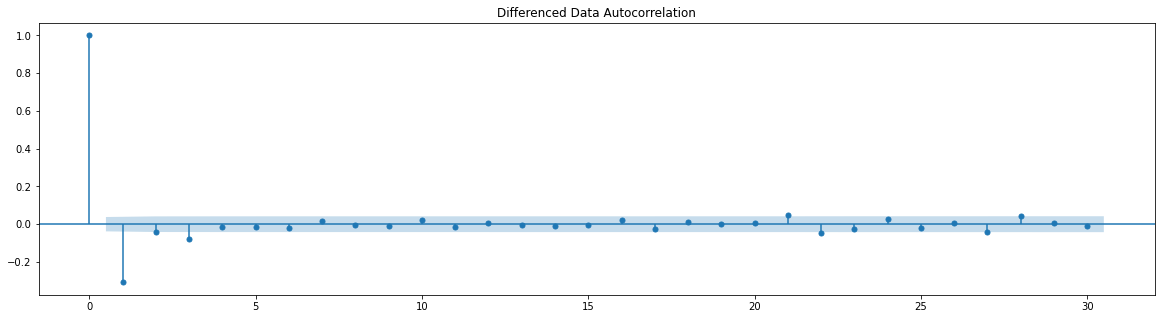

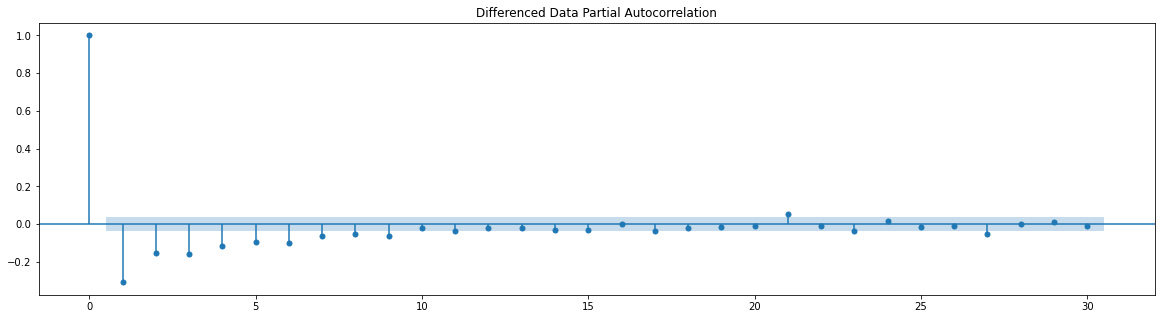

In [132]:
plot_acf(df1['Stock1'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plot_pacf(df1['Stock1'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [133]:
manual_ARIMA = ARIMA(train['Stock1'].astype('float64'), order=(0,1,0),freq=None)

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Stock1   No. Observations:                 2629
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3615.962
Method:                           css   S.D. of innovations              0.957
Date:                Sat, 02 Apr 2022   AIC                           7235.925
Time:                        17:16:46   BIC                           7247.674
Sample:                    07-22-2010   HQIC                          7240.179
                         - 10-01-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0124      0.019      0.665      0.506      -0.024       0.049


C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


**We get a comparatively simpler model by looking at the ACF and the PACF plots.**

**Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.**


## Predict on the Test Set using this model and evaluate the model.

In [135]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [136]:
rmse = mean_squared_error(test['Stock1'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1.5091050142967433


In [137]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1.71
"ARIMA(0,1,0)",1.51


**We see that there is difference in the RMSE values for both the models, but remember that the second model is a much simpler model.**

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).¶

**Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.**

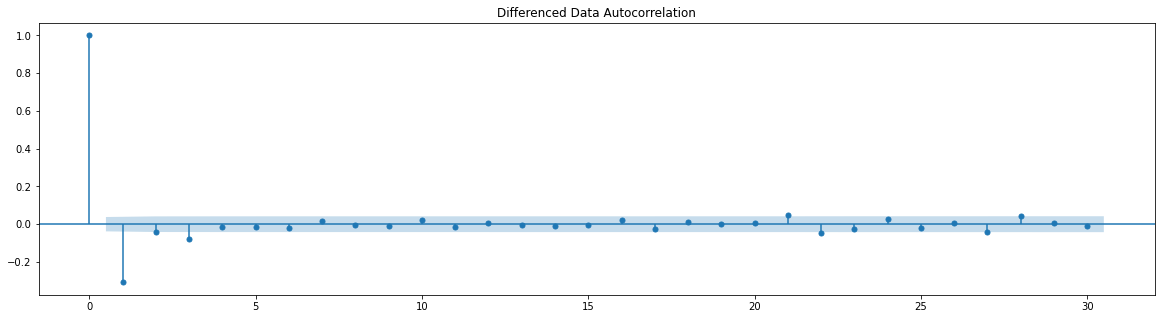

In [138]:
plot_acf(df1['Stock1'].diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plt.show()

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [139]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 5)
Model: (0, 1, 2)(0, 0, 2, 5)
Model: (1, 1, 0)(1, 0, 0, 5)
Model: (1, 1, 1)(1, 0, 1, 5)
Model: (1, 1, 2)(1, 0, 2, 5)
Model: (2, 1, 0)(2, 0, 0, 5)
Model: (2, 1, 1)(2, 0, 1, 5)
Model: (2, 1, 2)(2, 0, 2, 5)


In [140]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [141]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Stock1'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 5) - AIC:7232.2983235864
SARIMA(0, 1, 0)x(0, 0, 1, 5) - AIC:7221.224974924693
SARIMA(0, 1, 0)x(0, 0, 2, 5) - AIC:7210.542937254097
SARIMA(0, 1, 0)x(1, 0, 0, 5) - AIC:7224.165792623691
SARIMA(0, 1, 0)x(1, 0, 1, 5) - AIC:7222.304200603085
SARIMA(0, 1, 0)x(1, 0, 2, 5) - AIC:7212.272801231152
SARIMA(0, 1, 0)x(2, 0, 0, 5) - AIC:7212.235235072002
SARIMA(0, 1, 0)x(2, 0, 1, 5) - AIC:7214.123571635121
SARIMA(0, 1, 0)x(2, 0, 2, 5) - AIC:7212.1022213197775
SARIMA(0, 1, 1)x(0, 0, 0, 5) - AIC:6853.442199064795
SARIMA(0, 1, 1)x(0, 0, 1, 5) - AIC:6830.60948434033
SARIMA(0, 1, 1)x(0, 0, 2, 5) - AIC:6820.137961496254
SARIMA(0, 1, 1)x(1, 0, 0, 5) - AIC:6837.147246463372
SARIMA(0, 1, 1)x(1, 0, 1, 5) - AIC:6831.48126246876
SARIMA(0, 1, 1)x(1, 0, 2, 5) - AIC:6822.0762084041025
SARIMA(0, 1, 1)x(2, 0, 0, 5) - AIC:6826.484514810241
SARIMA(0, 1, 1)x(2, 0, 1, 5) - AIC:6827.308266117963
SARIMA(0, 1, 1)x(2, 0, 2, 5) - AIC:6823.981634323971
SARIMA(0, 1, 2)x(0, 0, 0, 5) - AIC:6781.61968777

C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 0)x(0, 0, 0, 5) - AIC:6914.595332206216
SARIMA(2, 1, 0)x(0, 0, 1, 5) - AIC:6902.301976059073
SARIMA(2, 1, 0)x(0, 0, 2, 5) - AIC:6892.74129869213
SARIMA(2, 1, 0)x(1, 0, 0, 5) - AIC:6898.411880640374
SARIMA(2, 1, 0)x(1, 0, 1, 5) - AIC:6900.585050609732
SARIMA(2, 1, 0)x(1, 0, 2, 5) - AIC:6893.23011274085
SARIMA(2, 1, 0)x(2, 0, 0, 5) - AIC:6888.285680217582
SARIMA(2, 1, 0)x(2, 0, 1, 5) - AIC:6890.283413151551
SARIMA(2, 1, 0)x(2, 0, 2, 5) - AIC:6892.2832750537555
SARIMA(2, 1, 1)x(0, 0, 0, 5) - AIC:6732.373205953807
SARIMA(2, 1, 1)x(0, 0, 1, 5) - AIC:6723.019103785692
SARIMA(2, 1, 1)x(0, 0, 2, 5) - AIC:6710.254520220318
SARIMA(2, 1, 1)x(1, 0, 0, 5) - AIC:6723.013719185626
SARIMA(2, 1, 1)x(1, 0, 1, 5) - AIC:6725.012714280487
SARIMA(2, 1, 1)x(1, 0, 2, 5) - AIC:6712.111499215893
SARIMA(2, 1, 1)x(2, 0, 0, 5) - AIC:6710.5571525190435
SARIMA(2, 1, 1)x(2, 0, 1, 5) - AIC:6712.385557133631
SARIMA(2, 1, 1)x(2, 0, 2, 5) - AIC:6714.053381410979
SARIMA(2, 1, 2)x(0, 0, 0, 5) - AIC:6729.386066

In [142]:
SARIMA_AIC.sort_values(by=['AIC']).count()

param       81
seasonal    81
AIC         81
dtype: int64

In [143]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
80,"(2, 1, 2)","(2, 0, 2, 5)",6706.50
74,"(2, 1, 2)","(0, 0, 2, 5)",6706.96
77,"(2, 1, 2)","(1, 0, 2, 5)",6708.45
65,"(2, 1, 1)","(0, 0, 2, 5)",6710.25
78,"(2, 1, 2)","(2, 0, 0, 5)",6710.29


In [144]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Stock1'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2630
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 5)   Log Likelihood               -3344.252
Date:                           Sat, 02 Apr 2022   AIC                           6706.503
Time:                                   17:22:02   BIC                           6759.328
Sample:                                        0   HQIC                          6725.637
                                          - 2630                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0385      0.243     -0.158      0.874      -0.515       0.438
ar.L2          0.2633      0.097      2.727

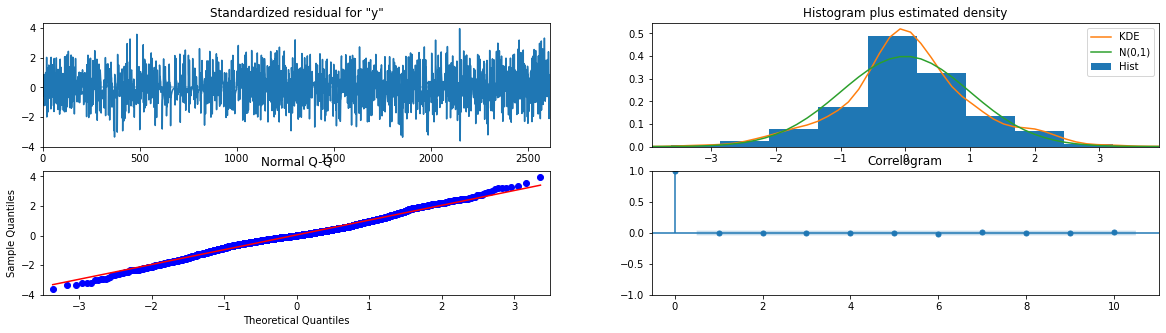

In [145]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

**From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.**

## Predict on the Test Set using this model and evaluate the model.

In [147]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [148]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,56.47,0.87,54.77,58.17
1,56.42,1.00,54.46,58.37
2,56.38,1.07,54.27,58.48
3,56.36,1.12,54.17,58.55
4,56.36,1.15,54.10,58.62


In [149]:
rmse = mean_squared_error(test['Stock1'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

1.9122127417002999


In [150]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(2,0,2,5)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1.71
"ARIMA(0,1,0)",1.51
"SARIMA(2,1,2)(2,0,2,5)",1.91


**We see that we have huge gain the RMSE value by including the seasonal parameters as well.**

## SARIMA Manual Method

In [152]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Stock1'].values,
                                order=(1, 1, 0),
                                seasonal_order=(0, 1, 0, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2630
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 5)   Log Likelihood               -4427.254
Date:                           Sat, 02 Apr 2022   AIC                           8858.507
Time:                                   17:24:22   BIC                           8870.252
Sample:                                        0   HQIC                          8862.761
                                          - 2630                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2864      0.018    -15.984      0.000      -0.321      -0.251
sigma2         1.7123      0.044     38.660

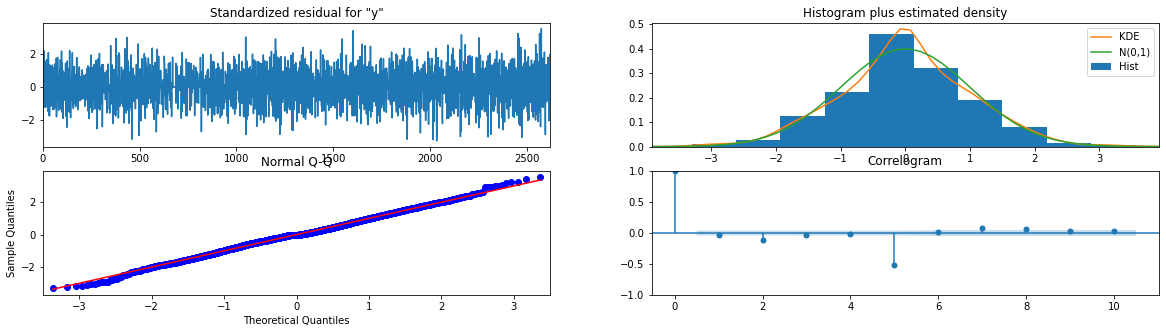

In [153]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [154]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [155]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,57.46,1.31,54.90,60.03
1,56.68,1.61,53.53,59.84
2,57.29,1.92,53.54,61.04
3,57.28,2.17,53.04,61.53
4,57.29,2.39,52.59,61.98


In [156]:
rmse = mean_squared_error(test['Stock1'],predicted_manual_SARIMA.predicted_mean,squared=False)
print(rmse)

1.4808802886411458


In [157]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,0)(0,1,0,5)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1.71
"ARIMA(0,1,0)",1.51
"SARIMA(2,1,2)(2,0,2,5)",1.91
"SARIMA(1,1,0)(0,1,0,5)",1.48


## Building the most optimum model on the Full Data.¶

In [158]:
full_data_model = sm.tsa.statespace.SARIMAX(df1['Stock1'],
                                order=(1,1,0),
                                seasonal_order=(0, 1, 0, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            Stock1   No. Observations:                 2660
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 5)   Log Likelihood               -4478.433
Date:                           Sat, 02 Apr 2022   AIC                           8960.867
Time:                                   17:25:36   BIC                           8972.634
Sample:                               07-21-2010   HQIC                          8965.126
                                    - 10-31-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2869      0.018    -16.075      0.000      -0.322      -0.252
sigma2         1.7130      0.044     38.786

C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


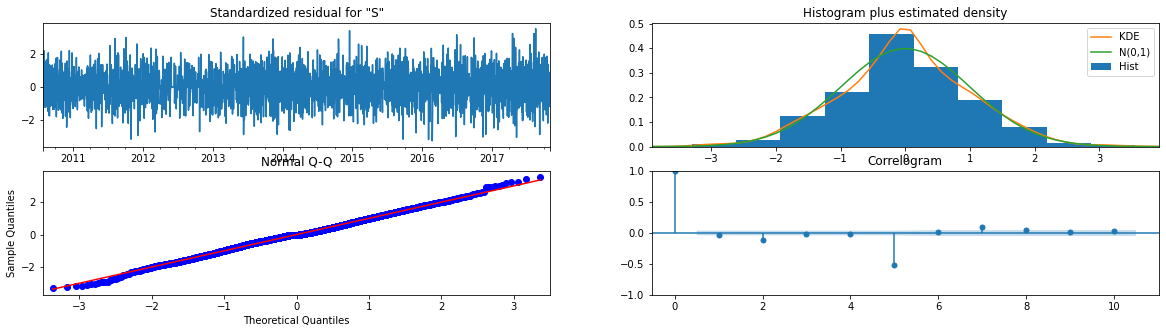

In [159]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 12 months into the future (between Aug-1995 until July-1996)

In [160]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=30)

In [161]:
predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).head(30)

Stock1,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-11-01,57.32,1.31,54.75,59.88
2017-11-02,57.41,1.61,54.26,60.56
2017-11-03,57.38,1.92,53.63,61.14
2017-11-04,57.33,2.17,53.09,61.58
2017-11-05,56.70,2.39,52.01,61.39
2017-11-06,56.52,3.34,49.98,63.06
2017-11-07,56.61,3.86,49.04,64.19
2017-11-08,56.58,4.38,48.00,65.17
2017-11-09,56.53,4.83,47.08,65.99
2017-11-10,55.90,5.24,45.64,66.16


In [162]:
rmse = mean_squared_error(df1['Stock1'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full data: SARIMA model, Stock1',rmse)

RMSE of the Full data: SARIMA model, Stock1 1.4171287818445206


In [163]:
# pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='2017-10-02', end='2017-10-31', freq='D'))

In [164]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='2017-11-01', end='2017-11-30', freq='D'))

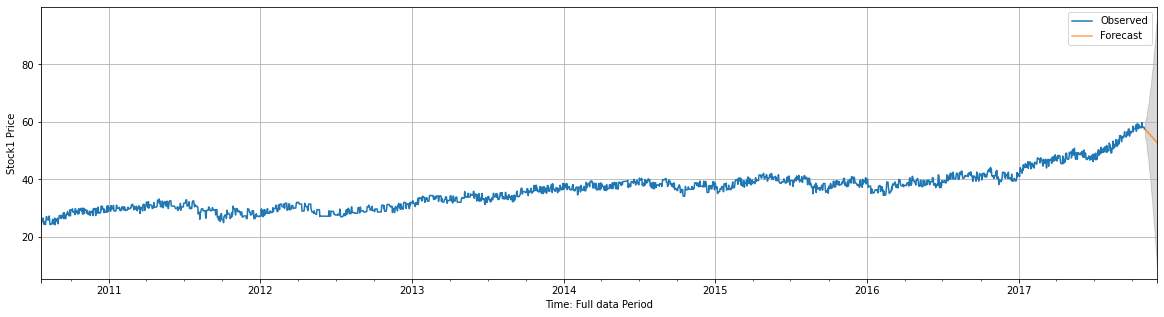

In [165]:
# plot the forecast along with the confidence band for Full Data (train + test data).

axis = df1['Stock1'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Time: Full data Period')
axis.set_ylabel('Stock1 Price')
plt.legend(loc='best')
plt.grid()
plt.show()

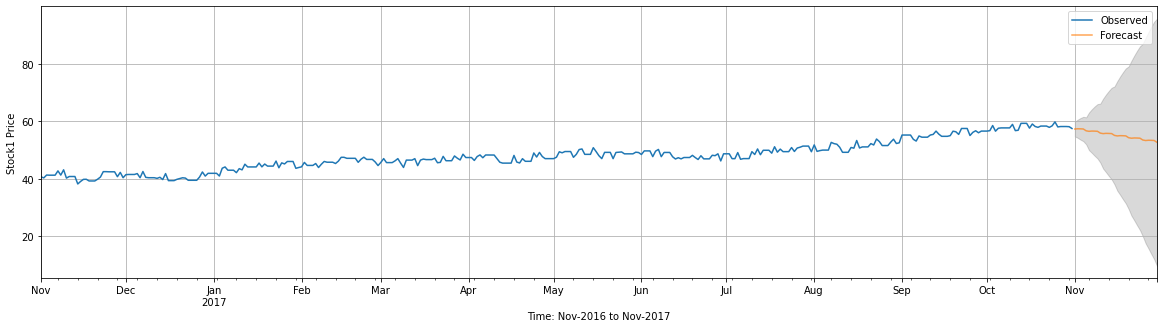

In [166]:
# plot the forecast along with the confidence band for Oct-2017 (length of Test data).

axis = df1['Stock1']['2016-11-01' : '2017-11-30'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Time: Nov-2016 to Nov-2017')
axis.set_ylabel('Stock1 Price')
plt.legend(loc='best')
plt.grid()
plt.show()

In [167]:
resultsDf

,RMSE
"ARIMA(2,1,2)",1.71
"ARIMA(0,1,0)",1.51
"SARIMA(2,1,2)(2,0,2,5)",1.91
"SARIMA(1,1,0)(0,1,0,5)",1.48


# The same way Model building is done for "STOCK2", STOCK3" and "STOCK4".